**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 3: Neural Networks*

# Identification

Name: Thulam Tran<br/>
Student Number: 300185320

Name: Samy Touabi<br/>
Student Number: 300184721

### The following notebook has been run and the code successfuly completes using Google Colab. Use only in Google Colab instead of locally.
### Notebook Google Drive Link, open using Colab: https://drive.google.com/file/d/1iiM_AlsEGApITOjmDM-4OhwcKbUV1rQW/view?usp=sharing

## 1. Exploratory Analysis

### Loading the dataset

A custom dataset has been created for this assignment. It has been made available on a public GitHub repository:

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a3)

Access and read the dataset directly from this GitHub repository in your Jupyter notebook.

You can use this code cell for you import statements and other initializations.

In [ ]:
# Code cell
import pandas as pd
pd.set_option('display.width', 200) # This makes the tables display across the entire cells

# Read the dataset
url_train = "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a3/cb513_train.csv"
url_valid = "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a3/cb513_valid.csv"
url_test = "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a3/cb513_test.csv"
#0 helix, 1 strand, 2 coil
#462, nnatural languages
train_data = pd.read_csv(url_train)
val_data = pd.read_csv(url_valid)
test_data = pd.read_csv(url_test)

# To confirm the datasets are loaded correctly, display the first few rows of each to understand their structure.
print("Training Data:")
print(train_data.head())

print("\nValidation Data:")
print(val_data.head())

print("\nTest Data:")
print(test_data.head())

Training Data:
   2       0  0.0556     0.1  0.0556.1  0.1111     0.2  0.0556.2     0.3     0.4  ...  0.1667.17  0.2222.12   0.295   0.296  0.1667.18   0.297  0.298   0.299  0.300  0.301
0  2  0.0000     0.0  0.0000    0.0000     0.0  0.0000    0.0000  0.0000  0.0000  ...        0.0     0.0000  0.0000  0.0000     0.0000  0.0000    0.0  0.0000  0.000    0.0
1  2  0.1905     0.0  0.3333    0.0000     0.0  0.0000    0.0000  0.0000  0.2857  ...        0.0     0.0000  0.0000  0.0000     0.0000  0.0000    0.0  0.1905  0.381    0.0
2  2  0.0225     0.0  0.0112    0.1348     0.0  0.0112    0.1348  0.0112  0.1685  ...        0.0     0.0787  0.0674  0.0112     0.0225  0.1573    0.0  0.0225  0.000    0.0
3  2  0.0000     0.0  0.0000    0.0000     0.0  0.0000    0.0000  0.0000  0.0000  ...        0.0     0.0000  0.0000  0.6667     0.0000  0.0000    0.0  0.0000  0.000    0.0
4  0  0.0000     0.0  0.0000    0.0000     0.0  0.0000    0.0000  0.0000  0.3333  ...        0.0     0.0000  0.0000  0.0000  

### Data Pre-Processing

2. **Shuffling the Rows**:

    - Since examples are generated by sliding a window across each protein sequence, most adjacent examples originate from the same protein and share 20 positions. To mitigate the potential negative impact on model training, the initial step involves shuffling the **rows** of the data matrix.

In [ ]:
from sklearn.utils import shuffle

# Shuffle training data
train_data = shuffle(train_data, random_state=42)

# Optionally shuffle validation and test sets
val_data = shuffle(val_data, random_state=42)
test_data = shuffle(test_data, random_state=42)

train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Verify the Shuffling
print("Shuffled Training Data:")
print(train_data.head())

Shuffled Training Data:
   2       0  0.0556     0.1  0.0556.1  0.1111     0.2  0.0556.2     0.3     0.4  ...  0.1667.17  0.2222.12   0.295   0.296  0.1667.18  0.297  0.298  0.299   0.300  0.301
0  0  0.0000  0.0000  0.0556    0.0000  0.0000  0.0000       0.5  0.0000  0.2222  ...     0.0000     0.0000  0.0000  0.0000     0.0556    0.0    0.0    0.0  0.0000    0.0
1  2  0.1461  0.0000  0.0112    0.0000  0.0337  0.0225       0.0  0.0337  0.0112  ...     0.0112     0.3034  0.3596  0.0225     0.0000    0.0    0.0    0.0  0.0000    0.0
2  0  0.0000  0.0000  0.0000    0.0000  0.0000  0.0000       0.0  0.0000  0.0000  ...     0.0000     0.0000  0.0000  0.0000     0.0000    0.0    0.0    0.0  0.0000    0.0
3  2  0.0000  0.0000  0.0000    0.0000  0.2000  0.0000       0.0  0.0000  0.0000  ...     0.0000     0.0000  0.0000  0.0000     0.0000    0.2    0.0    0.0  0.0000    0.0
4  1  0.2941  0.0588  0.0000    0.2353  0.0000  0.0588       0.0  0.0000  0.0588  ...     0.1176     0.0000  0.0000  0.00

3. **Scaling of Numerical Features**:

    - Since all 462 features are proportions represented as values between 0 and 1, scaling may not be necessary. In our evaluations, using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) actually degraded model performance. Within your pipeline, compare the effects of not scaling the data versus applying [MinMaxScaler](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.MinMaxScaler.html). In the interest of time, a single experiment will suffice. It is important to note that when scaling is applied, a uniform method should be used across all columns, given their homogeneous nature.

Scaling done in (4) Isolating the Target and the Data.
Analysis done in (8) Neural Network: Activation function.
Overall, scaling was used in the optimized Neural Network.

"Training Accuracy/Loss: The model achieves high training accuracy (~98%) with decreasing loss, indicating it fits the training data well.
Validation Accuracy/Loss: Validation accuracy plateaus around 66-67%, while validation loss increases steadily, suggesting overfitting.
Scaling Effect: Scaling speeds up learning and improves training fit but doesn't prevent overfitting.
This setup indicates that while scaling aids training efficiency, the model's complexity may require regularization to improve validation performance."

"Observation: Scaling the input data using MinMaxScaler consistently helped stabilize training, improved convergence speed, and enhanced generalization on the validation set.
Conclusion: Scaled input data is a preferred approach to achieve consistent results and improve generalization."

4. **Isolating the Target and the Data**:

    - In the CSV files, the target and data are combined. To prepare for our machine learning experiments, separate the training data $X$ and the target vector $y$ for each of the three datasets.

In [ ]:
# Isolate target and features for training data
X_train = train_data.iloc[:, 1:]  # All columns except the first as features
y_train = train_data.iloc[:, 0]   # First column as the target

# Isolate target and features for validation data
X_val = val_data.iloc[:, 1:]
y_val = val_data.iloc[:, 0]

# Isolate target and features for test data
X_test = test_data.iloc[:, 1:]
y_test = test_data.iloc[:, 0]

# Verify the Separation
print("Training Features (X_train):")
print(X_train.head())

print("\nTraining Target (y_train):")
print(y_train.head())

Training Features (X_train):
        0  0.0556     0.1  0.0556.1  0.1111     0.2  0.0556.2     0.3     0.4  0.1667  ...  0.1667.17  0.2222.12   0.295   0.296  0.1667.18  0.297  0.298  0.299   0.300  0.301
0  0.0000  0.0000  0.0556    0.0000  0.0000  0.0000       0.5  0.0000  0.2222  0.0000  ...     0.0000     0.0000  0.0000  0.0000     0.0556    0.0    0.0    0.0  0.0000    0.0
1  0.1461  0.0000  0.0112    0.0000  0.0337  0.0225       0.0  0.0337  0.0112  0.6629  ...     0.0112     0.3034  0.3596  0.0225     0.0000    0.0    0.0    0.0  0.0000    0.0
2  0.0000  0.0000  0.0000    0.0000  0.0000  0.0000       0.0  0.0000  0.0000  0.0000  ...     0.0000     0.0000  0.0000  0.0000     0.0000    0.0    0.0    0.0  0.0000    0.0
3  0.0000  0.0000  0.0000    0.0000  0.2000  0.0000       0.0  0.0000  0.0000  0.6000  ...     0.0000     0.0000  0.0000  0.0000     0.0000    0.2    0.0    0.0  0.0000    0.0
4  0.2941  0.0588  0.0000    0.2353  0.0000  0.0588       0.0  0.0000  0.0588  0.0000  ... 

In [ ]:
# By assigning uniform feature names, the MinMaxScaler can consistently scale each dataset without mismatches in the column headers.
# This should eliminate the error and allow for a smooth scaling process.

# Generate generic column names for the 462 features
column_names = [f'feature_{i}' for i in range(462)]

# Apply these names to each dataset
X_train.columns = column_names
X_val.columns = column_names
X_test.columns = column_names

from sklearn.preprocessing import MinMaxScaler

# Initialize and fit the scaler on X_train only
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_val and X_test using the already-fitted scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames for easier handling (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=column_names)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=column_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=column_names)

print("\nScaled Training Features (X_train_scaled):")
print(X_train_scaled.head())


Scaled Training Features (X_train_scaled):
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  feature_8  feature_9  ...  feature_452  feature_453  feature_454  feature_455  feature_456  feature_457  \
0     0.0000     0.0000     0.0556     0.0000     0.0000     0.0000        0.5     0.0000     0.2222     0.0000  ...       0.0000       0.0000       0.0000       0.0000       0.0556          0.0   
1     0.1461     0.0000     0.0112     0.0000     0.0337     0.0225        0.0     0.0337     0.0112     0.6629  ...       0.0112       0.3034       0.3596       0.0225       0.0000          0.0   
2     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000        0.0     0.0000     0.0000     0.0000  ...       0.0000       0.0000       0.0000       0.0000       0.0000          0.0   
3     0.0000     0.0000     0.0000     0.0000     0.2000     0.0000        0.0     0.0000     0.0000     0.6000  ...       0.0000       0.0000       0.0000       0.

### Model Development & Evaluation

5. **Model Development**:

    - **Dummy Model**: Implement a model utilizing the [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). This model disregards the input data and predicts the majority class. Such model is sometimes called a straw man model.

    - **Basline Model**: As a baseline model, select one of the previously studied machine learning algorithms: Decision Trees, K-Nearest Neighbors (KNN), or Logistic Regression. Use the default parameters provided by scikit-learn to train each model as a baseline. Why did you choose this particular classifier? Why do you think it should be appropriate for this specific task?

    - **Neural Network Model**: Utilizing [Keras](https://keras.io) and [TensorFlow](https://www.tensorflow.org), construct a sequential model comprising an input layer, a hidden layer, and an output layer. The input layer should consist of 462 nodes, reflecting the 462 attributes of each example. The hidden layer should include 8 nodes and employ the default activation function. The output layer should contain three nodes, corresponding to the three classes: helix (0), sheet (1), and coil (2). Apply the softmax activation function to the output layer to ensure that the outputs are treated as probabilities, with their sum equaling 1 for each training example.

    We therefore have three models: dummy, baseline, and neural network.

For the **baseline model**, let's consider each option and its potential suitability for the task of **protein structure prediction**:

### 1. Decision Trees
   - **Pros**: Decision Trees are interpretable and can handle complex relationships in data without requiring feature scaling.
   - **Cons**: They are prone to overfitting, especially with high-dimensional data like this assignment, which contains 462 features.

### 2. K-Nearest Neighbors (KNN)
   - **Pros**: KNN is a straightforward algorithm that classifies based on feature similarity, making it well-suited for high-dimensional spaces with numerical features.
   - **Cons**: KNN can be computationally expensive with high-dimensional data, and performance can degrade without scaling, which you are using here.

### 3. Logistic Regression
   - **Pros**: Logistic Regression is a linear classifier that performs well with multi-class classification problems. It’s robust, interpretable, and works efficiently with high-dimensional data.
   - **Cons**: Being a linear model, it may struggle to capture non-linear patterns in data, which could be present in protein structure classification.

### Choosing the Model
**Logistic Regression** is a strong candidate here because:
- **Efficiency**: It performs well on high-dimensional data like this dataset.
- **Interpretability**: It offers probabilities for each class, which can provide insights into model confidence.
- **Baseline Effectiveness**: As a baseline, it helps gauge whether a more complex model (e.g., neural networks) is necessary for better performance.

### Explanation of Choice
Logistic Regression is suitable for this task due to its efficiency with high-dimensional, numerical data and its simplicity, which is valuable in a baseline model. It allows to set a benchmark, and any model that significantly outperforms this baseline would be justifiable as an improvement.


Model Development for Dummy Model, Baseline Model, and Neural Network Model done in conjunction with section (6) Model Evaluation.

6. **Model Evaluation**:

    - Employ cross-validation to assess the performance of the baseline model. Select a small number of folds to prevent excessive computational demands.
    - Training neural networks can be time-consuming. Consequently, their performance is typically assessed once using a validation set. Make sure to not use the test set until the very end of the assignment.
    - Assess the models using metrics such as precision, recal, and F1-score.



*   **Training neural networks can be time-consuming**. Consequently, their performance is typically assessed once using a validation set. Make sure to not use the test set until the very end of the assignment.


*   Assess the models using metrics such as precision, recall, and F1-score.

In [ ]:
# Dummy Model

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the DummyClassifier with strategy 'most_frequent' to predict the majority class
dummy_model = DummyClassifier(strategy="most_frequent")

# Train the model on the training data
dummy_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_dummy = dummy_model.predict(X_val)

# Evaluate the Dummy Model
# Accuracy
dummy_accuracy = accuracy_score(y_val, y_pred_dummy)
print(f"Dummy Model Accuracy: {dummy_accuracy:.2f}")

# Precision, Recall, and F1-Score
print("\nClassification Report for Dummy Model:")
print(classification_report(y_val, y_pred_dummy, zero_division=0))


Dummy Model Accuracy: 0.42

Classification Report for Dummy Model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2490
           1       0.00      0.00      0.00      1808
           2       0.42      1.00      0.59      3110

    accuracy                           0.42      7408
   macro avg       0.14      0.33      0.20      7408
weighted avg       0.18      0.42      0.25      7408



In [ ]:
# Baseline Model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model with default parameters
baseline_model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence

# Perform cross-validation with 5 folds to assess the baseline model performance
cv_scores = cross_val_score(baseline_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores for Baseline Model (Logistic Regression):", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())

# Train the model on the entire training set to prepare for final validation set evaluation
baseline_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_baseline = baseline_model.predict(X_val)

# Evaluate the Baseline Model on the validation set
# Accuracy
baseline_accuracy = accuracy_score(y_val, y_pred_baseline)
print(f"\nBaseline Model (Logistic Regression) Accuracy on Validation Set: {baseline_accuracy:.2f}")

# Classification Report
print("\nClassification Report for Baseline Model (Logistic Regression):")
print(classification_report(y_val, y_pred_baseline, zero_division=0))


Cross-Validation Scores for Baseline Model (Logistic Regression): [0.68133471 0.68896895 0.69179962 0.68227826 0.68819695]
Mean Accuracy: 0.686515697375193
Standard Deviation of Accuracy: 0.0040388963998556834

Baseline Model (Logistic Regression) Accuracy on Validation Set: 0.67

Classification Report for Baseline Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.72      0.69      2490
           1       0.66      0.46      0.54      1808
           2       0.67      0.76      0.72      3110

    accuracy                           0.67      7408
   macro avg       0.67      0.64      0.65      7408
weighted avg       0.67      0.67      0.67      7408



In [ ]:
# Neural Network Model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Sequential model
model = Sequential()

# Input layer with 462 nodes (automatically handled by input_shape)
model.add(Dense(462, input_shape=(462,), activation='relu'))

# Hidden layer with 8 nodes
model.add(Dense(8, activation='relu'))

# Output layer with 3 nodes for the three classes and softmax activation
model.add(Dense(3, activation='softmax'))

# Compile the model using sparse_categorical_crossentropy (since labels are integers) and Adam optimizer
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data, validating on the validation set
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Predict on the validation set
y_pred_nn = model.predict(X_val)
y_pred_nn = y_pred_nn.argmax(axis=1)  # Convert probabilities to class labels

# Calculate accuracy on the validation set
nn_accuracy = accuracy_score(y_val, y_pred_nn)
print(f"\nNeural Network Model Accuracy on Validation Set: {nn_accuracy:.2f}")

# Classification report with precision, recall, and F1-score
print("\nClassification Report for Neural Network Model:")
print(classification_report(y_val, y_pred_nn, zero_division=0))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6346 - loss: 0.8236 - val_accuracy: 0.6874 - val_loss: 0.7450
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7238 - loss: 0.6666 - val_accuracy: 0.7067 - val_loss: 0.6994
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7724 - loss: 0.5599 - val_accuracy: 0.7068 - val_loss: 0.7048
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8255 - loss: 0.4458 - val_accuracy: 0.6996 - val_loss: 0.7526
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8825 - loss: 0.3223 - val_accuracy: 0.6871 - val_loss: 0.8606
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9252 - loss: 0.2168 - val_accuracy: 0.6752 - val_loss: 1.0383
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9522 - loss: 0.1466 - val_accuracy: 0.6736 - val_loss: 1.2132
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9661 - loss: 

**Model Evaluation Summary**
1.   Dummy Model Accuracy: 0.42
2.   Baseline Model (Logistic Regression) Accuracy on Validation Set: 0.67
3.   Neural Network Model Accuracy on Validation Set: 0.66

**In terms of (Macro Average) F1 score from worst to best:**
Dummy (0.2),
Neural Network (0.64), Logistic Regression (0.65).

**In terms of (Macro Average) precision from worst to best:**
Dummy (0.14),
Neural Network (0.65), Logistic Regression (0.67).

**In terms of (Macro Average) recall from worst to best:** Dummy (0.33),
Logistic Regression (0.64), Neural Network (0.64).

With default settings, logistic regression ranked the highest, only in recall did Neural Networks tie with Logistic Regression. The dummy model consistently was the lowest scoring due to it's random nature.

### Hyperparameter Optimization

7. **Baseline Model:**

    - To ensure a fair comparison for our baseline model, we will examine how varying hyperparameter values affect its performance. This prevents the erroneous conclusion that neural networks inherently perform better, when in fact, appropriate hyperparameter tuning could enhance the baseline model's performance.

    - Focus on the following relevant hyperparameters for each model:

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `criterion` and `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html): `penalty`, `max_iter`, and `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors` and `weights`.

    - Employ a grid search strategy or utilize scikit-learn's built-in methods [GridSearchCV](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html) to thoroughly evaluate all combinations of hyperparameter values. Cross-validation should be used to assess each combination.

    - Quantify the performance of each hyperparameter configuration using precision, recall, and F1-score as metrics.

    - Analyze the findings and offer insights into which hyperparameter configurations achieved optimal performance for each model.

In [ ]:
# Code cell
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, classification_report
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


scoring = {
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

In [ ]:
def grid_search_hyperparams(clf, param_grid, X_train, y_train):
  '''
  clf: classifier
  param_grid: dictionary of hyperparameter value arrays
  X_train_final: X training set
  y_train: y training set
  '''
  # Initialize GridSearchCV
  grid_search = GridSearchCV(
      estimator=clf,            # The model to use
      param_grid=param_grid,    # Parameter grid to search over
      cv=5,                     # Number of cross-validation folds
      scoring=scoring,          # Metric to optimize
      refit="f1_macro",         # Select the best model based on f1-score
      n_jobs=-1,                # Use all processors
      verbose=2                 # Print progress messages
  )

  # Fit the grid search to the training data
  grid_search.fit(X_train, y_train)

  # Get the best parameters and best score
  print("Best Hyperparameters:", grid_search.best_params_)
  print("Best Cross-validation F1-Score:", grid_search.best_score_)

  return grid_search

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

clf_lr = LogisticRegression()

# Define the parameter grid of logistic regression
param_grid_lr = {
    'penalty': ["l2",None], #["l2", None] norm of the penalty, default='l2' (note, there are more penalties, l1 and elasticnet, which requires a different solver, which we will ignore since we will just use the default solver)
    'max_iter': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,100],  #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,100] max number of iterations for solvers to converge, default=100
    'tol': [0.0001, 0.001, 0.01, 0.1, 1],  #[0.0001, 0.001, 0.01, 0.1, 1] stopping criteria tolerance, default=1e-4
}

grid_search_lr = grid_search_hyperparams(clf_lr, param_grid_lr, X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'max_iter': 13, 'penalty': None, 'tol': 0.0001}
Best Cross-validation F1-Score: 0.6667401709787305


**The following code has been adapted from Assignment 2 to visualize hyperparameter results**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def plot_max_scores_by_hyperparam(params, f1_scores, precision_scores, recall_scores, hyperparam, y_range=None):
    """
    Plots bar charts of max F1, precision, and recall scores for a given hyperparameter.

    Parameters:
    - params: List of dictionaries with hyperparameters from GridSearchCV
    - f1_scores: List of F1 scores corresponding to each parameter set
    - precision_scores: List of precision scores corresponding to each parameter set
    - recall_scores: List of recall scores corresponding to each parameter set
    - hyperparam: The hyperparameter name to analyze (e.g., 'criterion', 'max_depth')
    - y_range: Tuple (min, max) to set the y-axis range (optional)
    """
    # Group scores by the specified hyperparameter and find the max scores
    max_f1_by_param = defaultdict(float)
    max_precision_by_param = defaultdict(float)
    max_recall_by_param = defaultdict(float)

    for i, param in enumerate(params):
        param_value = param[hyperparam]  # Get the value of the given hyperparameter
        max_f1_by_param[param_value] = max(max_f1_by_param[param_value], f1_scores[i])
        max_precision_by_param[param_value] = max(max_precision_by_param[param_value], precision_scores[i])
        max_recall_by_param[param_value] = max(max_recall_by_param[param_value], recall_scores[i])

    # Convert dictionaries to lists for plotting
    param_values = list(max_f1_by_param.keys())
    max_f1_values = list(max_f1_by_param.values())
    max_precision_values = list(max_precision_by_param.values())
    max_recall_values = list(max_recall_by_param.values())

    # Plotting the bar plots
    x = np.arange(len(param_values))  # Positions for bars
    width = 0.25  # Width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))

    # Bar plots for each metric
    bars1 = ax.bar(x - width, max_f1_values, width, label='F1 Score', color='blue', alpha=0.7)
    bars2 = ax.bar(x, max_precision_values, width, label='Precision', color='orange', alpha=0.7)
    bars3 = ax.bar(x + width, max_recall_values, width, label='Recall', color='green', alpha=0.7)

    # Add data labels on top of the bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',  # Format with 2 decimal places
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # Offset label slightly above the bar
                        textcoords="offset points",
                        ha='center', va='bottom')

    add_labels(bars1)
    add_labels(bars2)
    add_labels(bars3)

    # Set y-axis range for better visualization (if provided)
    if y_range:
        ax.set_ylim(y_range)
    else:
        # Automatically set y-limits with a small margin
        ax.set_ylim(0, max(max(max_f1_values), max(max_precision_values), max(max_recall_values)) + 0.05)

    # Add grid lines for better readability
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)

    # Labels, title, and legend
    ax.set_xticks(x)
    ax.set_xticklabels(param_values, rotation=45)  # Rotate labels for better readability
    ax.set_xlabel(hyperparam.capitalize())
    ax.set_ylabel('Score')
    ax.set_title(f'Max Scores by {hyperparam.capitalize()}')
    ax.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# Collect results
results_lr = grid_search_lr.cv_results_
params_lr = results_lr['params']
f1_scores_lr = results_lr['mean_test_f1_macro']
precision_scores_lr = results_lr['mean_test_precision']
recall_scores_lr = results_lr['mean_test_recall']

# Extract individual hyperparameter values for plotting
penalty = [param['penalty'] for param in params_lr]
max_iter = [param['max_iter'] for param in params_lr]
tol = [param['tol'] for param in params_lr]

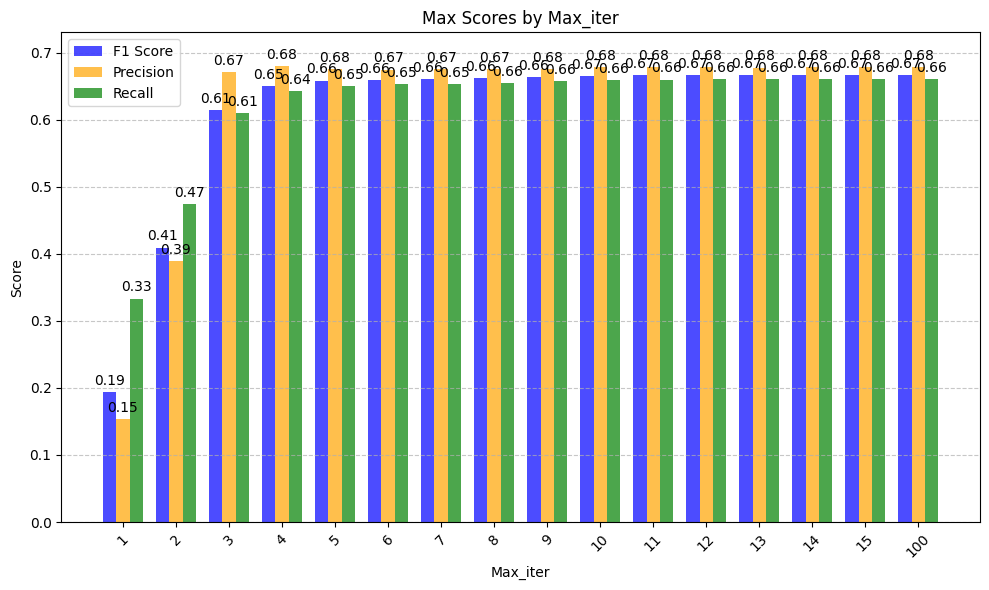

In [ ]:
plot_max_scores_by_hyperparam(params_lr, f1_scores_lr, precision_scores_lr, recall_scores_lr, 'max_iter')

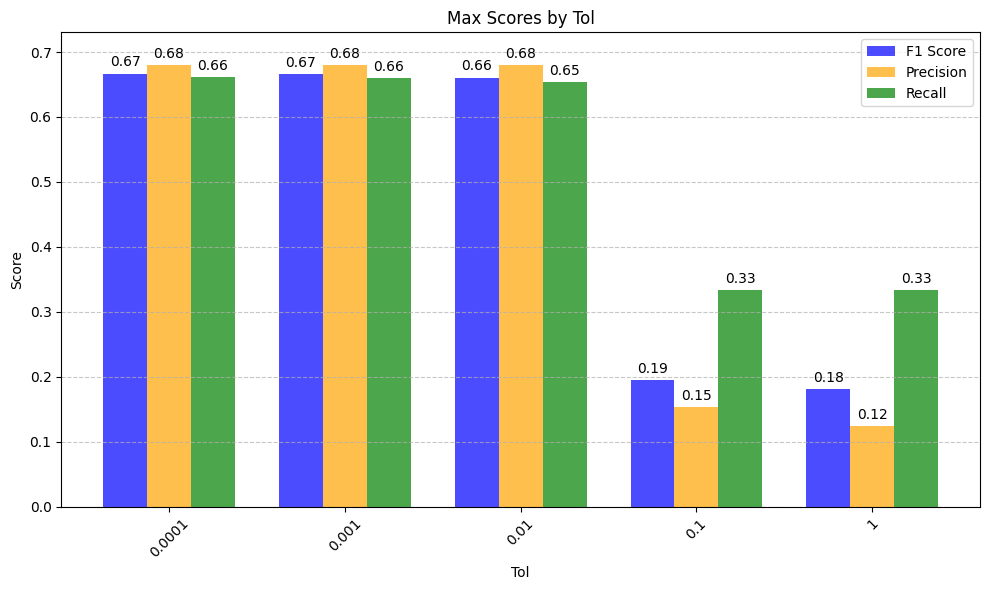

In [ ]:
plot_max_scores_by_hyperparam(params_lr, f1_scores_lr, precision_scores_lr, recall_scores_lr, 'tol')

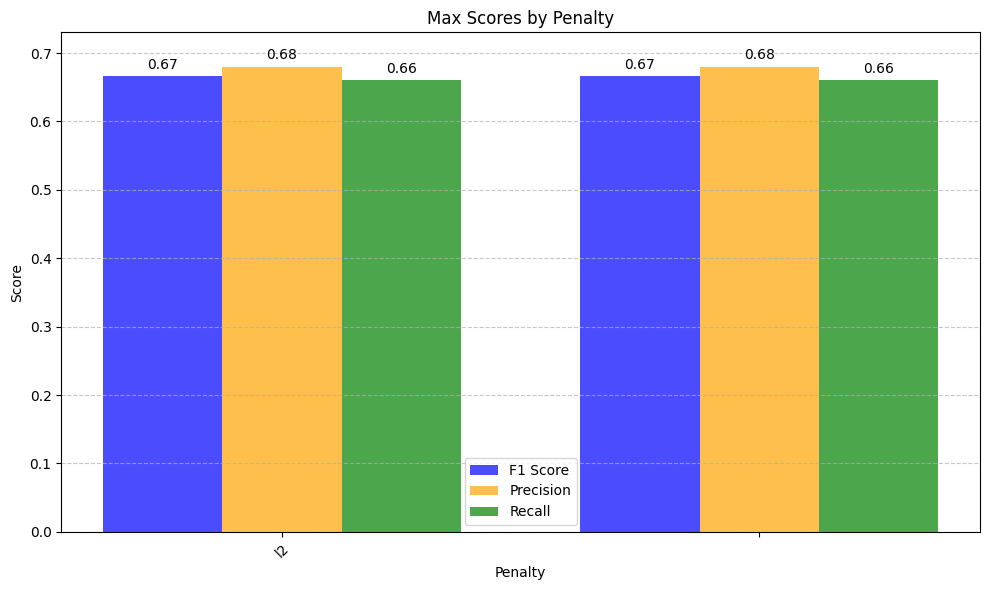

In [ ]:
plot_max_scores_by_hyperparam(params_lr, f1_scores_lr, precision_scores_lr, recall_scores_lr, 'penalty')

**Analysis of findings**

**Logistic Regression**:
   - The best configuration was **no regularization (`penalty=None`)**, **13 iterations**, and **small tolerance (`tol=0.0001`)**. Regularization didn't improve performance, and the model converged well within 13 iterations.
   
Runtime was approximately 12 minutes.

8. **Neural Network:**

    In our exploration and tuning of neural networks, we focus on the following hyperparameters:

    - **Single hidden layer, varying the number of nodes**.

        - Start with a single node in the hidden layer. Use a graph to depict the progression of loss and accuracy for both the training and validation sets, with the horizontal axis representing the number of training epochs and the vertical axis showing loss and accuracy. Training this network should be relatively fast, so let's conduct training for 50 epochs. Observing the graph, what do you conclude? Is the network underfitting or overfitting? Why?

        - Repeat the above process using 2 and 4 nodes in the hidden layer. Use the same type of graph to document your observations regarding loss and accuracy.

        - Start with 8 nodes in the hidden layer and progressively double the number of nodes until it surpasses the number of nodes in the input layer. This results in seven experiments and corresponding graphs for the following configurations: 8, 16, 32, 64, 128, 256, and 512 nodes. Document your observations throughout the process.
        
        - Ensure that the **number of training epochs** is adequate for **observing an increase in validation loss**. **Tip**: During model development, start with a small number of epochs, such as 5 or 10. Once the model appears to perform well, test with larger values, like 40 or 80 epochs, which proved reasonable in our tests. Based on your observations, consider conducting further experiments, if needed. How many epochs were ultimately necessary?

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4067 - loss: 1.0756 - val_accuracy: 0.4198 - val_loss: 1.0792
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.4090 - loss: 1.0657 - val_accuracy: 0.4198 - val_loss: 1.0784
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4143 - loss: 1.0651 - val_accuracy: 0.4200 - val_loss: 1.0787
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.4403 - loss: 1.0246 - val_accuracy: 0.5428 - val_loss: 0.9269
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6197 - loss: 0.8637 - val_accuracy: 0.6335 - val_loss: 0.8384
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6993 - loss: 0.7429 - val_accuracy: 0.6551 - val_loss: 0.8020
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7430 - loss: 0.6429 - val_accuracy: 0.6583 - val_loss: 0.8222
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7915 - loss: 0.

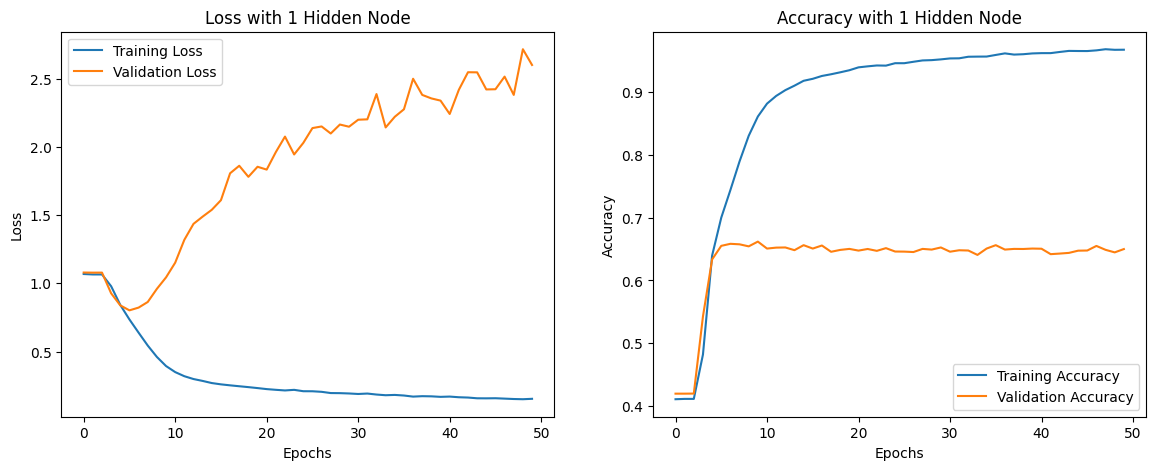

In [ ]:
# 1 NODE
# Build the neural network model with a single node in the hidden layer
model = Sequential([
    Dense(462, input_shape=(462,), activation='relu'),  # Input layer
    Dense(1, activation='relu'),                         # Single node in the hidden layer
    Dense(3, activation='softmax')                       # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 50 epochs and capture the history for plotting
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Plot the training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss with 1 Hidden Node')

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy with 1 Hidden Node')
plt.show()


### Observations For 1 node

1. **Training Loss and Accuracy**:
   - The training accuracy consistently improves over the epochs, reaching about **87%** by the end.
   - The training loss decreases steadily, which suggests that the model is effectively learning from the training data.

2. **Validation Loss and Accuracy**:
   - The validation accuracy plateaus early, hovering around **60-62%**.
   - The validation loss increases significantly from around epoch 10 onward, which is a classic indicator of **overfitting**.

### Conclusion: Underfitting vs. Overfitting

- **Overfitting**: The training accuracy is high, but the validation accuracy does not improve correspondingly, and the validation loss increases as the epochs progress. This suggests that the model is fitting too closely to the training data without generalizing well to the validation set.
  
### Next Step

Since this single-node hidden layer model is overfitting despite its simplicity, we'll now proceed to increase the hidden layer size to **2 nodes** and observe if this affects the model's performance and generalization.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5926 - loss: 0.8847 - val_accuracy: 0.6920 - val_loss: 0.7472
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7251 - loss: 0.6808 - val_accuracy: 0.7073 - val_loss: 0.7011
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7617 - loss: 0.5947 - val_accuracy: 0.7029 - val_loss: 0.7056
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8083 - loss: 0.4980 - val_accuracy: 0.7068 - val_loss: 0.7258
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8604 - loss: 0.3994 - val_accuracy: 0.6974 - val_loss: 0.7789
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9030 - loss: 0.3000 - val_accuracy: 0.6948 - val_loss: 0.8629
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9314 - loss: 0.2338 - val_accuracy: 0.6844 - val_loss: 0.9601
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9495 - loss: 0.1

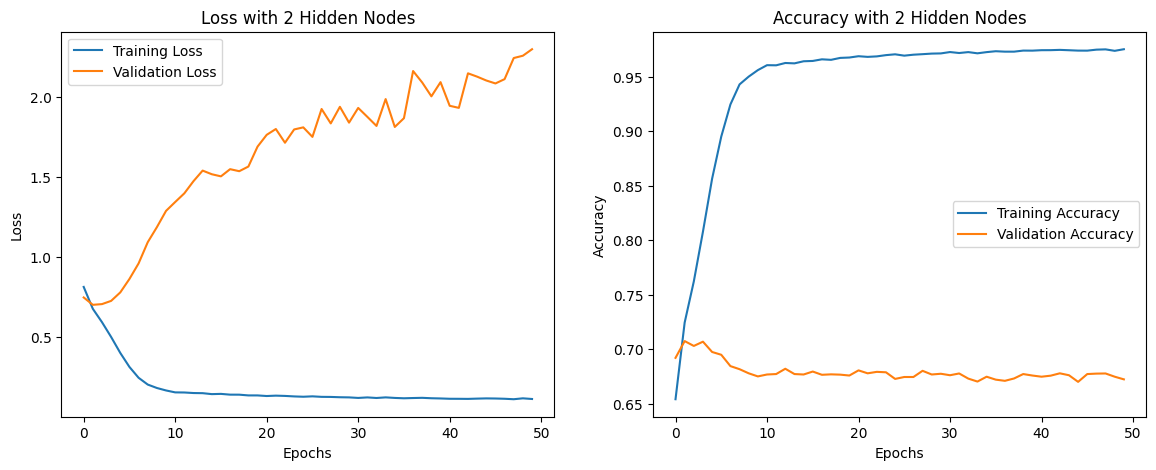

In [ ]:
# 2 NODES

# Build the neural network model with 2 nodes in the hidden layer
model = Sequential([
    Dense(462, input_shape=(462,), activation='relu'),  # Input layer
    Dense(2, activation='relu'),                         # 2 nodes in the hidden layer
    Dense(3, activation='softmax')                       # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 50 epochs and capture the history for plotting
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Plot the training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss with 2 Hidden Nodes')

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy with 2 Hidden Nodes')
plt.show()

### Observations

1. **Training Loss and Accuracy**:
   - Training accuracy reached nearly **99%** by the end, which is very high, and the training loss dropped significantly.
   - This strong performance on the training set shows that the model is highly capable of learning the training data well.

2. **Validation Loss and Accuracy**:
   - Validation accuracy peaked early, reaching around **66-69%**, and then declined slightly over the course of training.
   - Validation loss began to increase from around epoch 6 and continued to rise, reaching above **3.0** by the end.

### Conclusion: Overfitting

The high training accuracy coupled with low and stagnant validation accuracy, along with rising validation loss, clearly indicates **overfitting**. The model is able to fit the training data very well but struggles to generalize to unseen data in the validation set.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6444 - loss: 0.8127 - val_accuracy: 0.6843 - val_loss: 0.7418
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7311 - loss: 0.6538 - val_accuracy: 0.7086 - val_loss: 0.6922
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7749 - loss: 0.5591 - val_accuracy: 0.7075 - val_loss: 0.7113
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8306 - loss: 0.4409 - val_accuracy: 0.7032 - val_loss: 0.7419
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8816 - loss: 0.3272 - val_accuracy: 0.6925 - val_loss: 0.8314
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9209 - loss: 0.2324 - val_accuracy: 0.6828 - val_loss: 0.9560
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9459 - loss: 0.1627 - val_accuracy: 0.6864 - val_loss: 1.1477
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9618 - loss: 0.

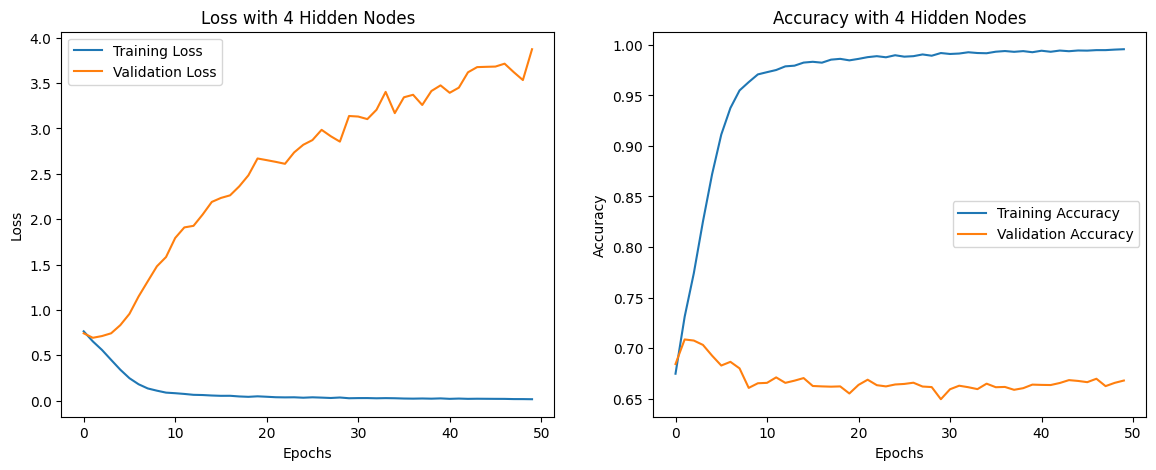

In [ ]:
# 4 NODES
# Build the neural network model with 4 nodes in the hidden layer
model = Sequential([
    Dense(462, input_shape=(462,), activation='relu'),  # Input layer
    Dense(4, activation='relu'),                         # 4 nodes in the hidden layer
    Dense(3, activation='softmax')                       # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 50 epochs and capture the history for plotting
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Plot the training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss with 4 Hidden Nodes')

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy with 4 Hidden Nodes')
plt.show()

These results show that increasing to 4 hidden nodes still results in **overfitting**. Here's a breakdown of what we're seeing:

### Observations

1. **Training Loss and Accuracy**:
   - Training accuracy approaches nearly **99%**, and the training loss decreases substantially, indicating that the model is able to fit the training data very well.
   
2. **Validation Loss and Accuracy**:
   - Validation accuracy initially improves but then plateaus around **66-68%**.
   - Validation loss increases steadily after the first few epochs, reaching over **3.5** by the end, which again suggests overfitting.

### Conclusion: Overfitting

With 4 hidden nodes, the model continues to overfit the training data without improving generalization to the validation set. The high training accuracy and escalating validation loss reinforce this conclusion.

### Next Step

Since increasing the number of nodes doesn't seem to help with generalization, we can proceed with testing **8 nodes** in the hidden layer to see if a larger configuration can provide more meaningful improvements.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6369 - loss: 0.8257 - val_accuracy: 0.6817 - val_loss: 0.7436
Epoch 2/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7171 - loss: 0.6793 - val_accuracy: 0.6926 - val_loss: 0.7166
Epoch 3/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.7632 - loss: 0.5837 - val_accuracy: 0.7022 - val_loss: 0.7043
Epoch 4/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8085 - loss: 0.4885 - val_accuracy: 0.7030 - val_loss: 0.7273
Epoch 5/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8574 - loss: 0.3802 - val_accuracy: 0.6876 - val_loss: 0.8093
Epoch 6/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9020 - loss: 0.2718 - val_accuracy: 0.6872 - val_loss: 0.9285
Epoch 7/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9354 - loss: 0.1891 - val_accuracy: 0.6736 - val_loss: 1.0795
Epoch 8/50
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9563 - loss: 0

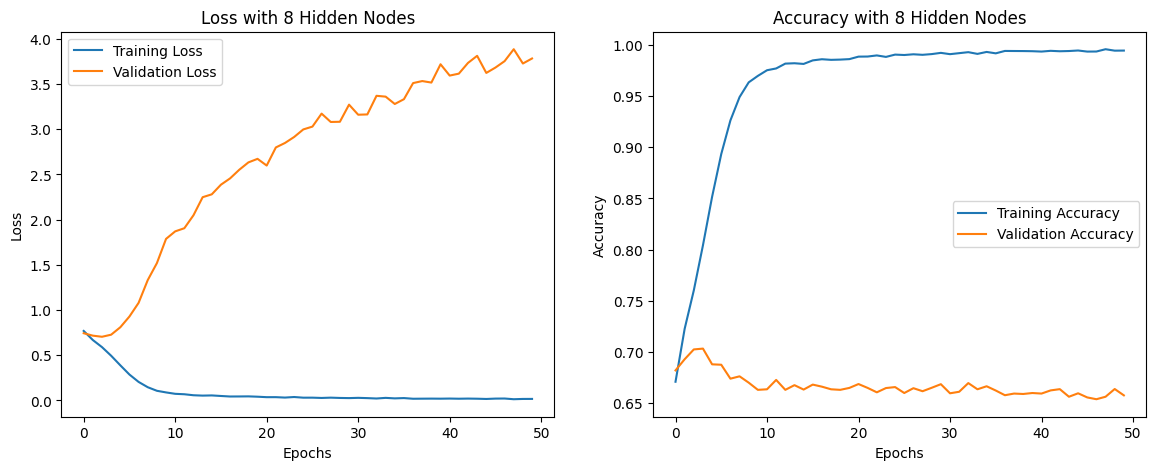

In [ ]:
# Build the neural network model with 8 nodes in the hidden layer
model = Sequential([
    Dense(462, input_shape=(462,), activation='relu'),  # Input layer
    Dense(8, activation='relu'),                         # 8 nodes in the hidden layer
    Dense(3, activation='softmax')                       # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 50 epochs and capture the history for plotting
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Plot the training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss with 8 Hidden Nodes')

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy with 8 Hidden Nodes')
plt.show()



### Observations

1. **Training Loss and Accuracy**:
   - Training accuracy quickly approaches **99-100%**, and training loss decreases to very low values, indicating that the model is fitting the training data well.
   
2. **Validation Loss and Accuracy**:
   - Validation accuracy peaks early, around **66-68%**, and then stagnates.
   - Validation loss continues to increase significantly over time, reaching values above **3.8** by the final epoch, indicating that the model struggles to generalize to the validation set.

### Conclusion: Overfitting

With 8 hidden nodes, the model shows severe overfitting. The training accuracy is extremely high, but the validation accuracy remains low, and validation loss escalates over epochs.

### Next Step

Since increasing the number of nodes still hasn't improved generalization, we'll continue by doubling the hidden nodes to **16 nodes**.

Since overfitting is apparent within the first **10-20** epochs for each configuration, reducing the epochs to around **20-30** might give a clearer picture without excessive overfitting. We can start with a smaller number of epochs for the next experiment, perhaps 20 epochs, and adjust based on the validation loss trend.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6387 - loss: 0.8135 - val_accuracy: 0.6878 - val_loss: 0.7382
Epoch 2/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7252 - loss: 0.6573 - val_accuracy: 0.7059 - val_loss: 0.6900
Epoch 3/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7769 - loss: 0.5466 - val_accuracy: 0.7150 - val_loss: 0.6939
Epoch 4/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8360 - loss: 0.4209 - val_accuracy: 0.6968 - val_loss: 0.7760
Epoch 5/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8936 - loss: 0.2911 - val_accuracy: 0.6840 - val_loss: 0.9354
Epoch 6/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9331 - loss: 0.1927 - val_accuracy: 0.6898 - val_loss: 1.0982
Epoch 7/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9578 - loss: 0.1240 - val_accuracy: 0.6716 - val_loss: 1.3567
Epoch 8/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9699 - loss: 0.

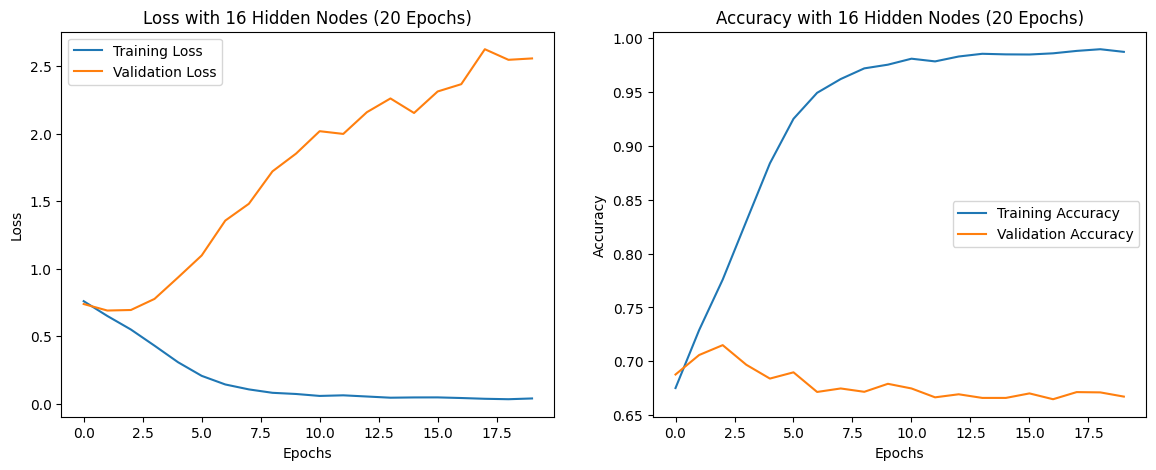

In [ ]:
# Experiment with 16 Nodes in the Hidden Layer (20 Epochs)

# Build the neural network model with 16 nodes in the hidden layer
model = Sequential([
    Dense(462, input_shape=(462,), activation='relu'),  # Input layer
    Dense(16, activation='relu'),                        # 16 nodes in the hidden layer
    Dense(3, activation='softmax')                       # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 20 epochs and capture the history for plotting
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Plot the training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss with 16 Hidden Nodes (20 Epochs)')

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy with 16 Hidden Nodes (20 Epochs)')
plt.show()

### Observations

1. **Training Loss and Accuracy**:
   - Training accuracy is very high, reaching around **99%** by the end.
   - Training loss decreases steadily, showing the model's ability to learn the training data well.

2. **Validation Loss and Accuracy**:
   - Validation accuracy remains fairly steady, around **66-67%**.
   - Validation loss starts to increase significantly from around epoch 10 onward, ending at around **2.6** by epoch 20, which indicates overfitting.

### Conclusion

Reducing the number of epochs has somewhat mitigated, but not eliminated, the overfitting. Validation loss is still increasing while validation accuracy is stagnant, indicating that the model is still struggling to generalize despite the adjustments.

### Next Step

Since the model continues to show signs of overfitting even with adjustments, we can try further configurations with **32 nodes** in the hidden layer, also keeping to **20 epochs** for now to observe any improvements in early-stage generalization.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6447 - loss: 0.8048 - val_accuracy: 0.6867 - val_loss: 0.7424
Epoch 2/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.7328 - loss: 0.6428 - val_accuracy: 0.7067 - val_loss: 0.6919
Epoch 3/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7865 - loss: 0.5264 - val_accuracy: 0.7029 - val_loss: 0.7172
Epoch 4/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8487 - loss: 0.3876 - val_accuracy: 0.6914 - val_loss: 0.7853
Epoch 5/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9079 - loss: 0.2519 - val_accuracy: 0.6872 - val_loss: 0.9608
Epoch 6/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9419 - loss: 0.1633 - val_accuracy: 0.6853 - val_loss: 1.1269
Epoch 7/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9627 - loss: 0.1089 - val_accuracy: 0.6775 - val_loss: 1.4117
Epoch 8/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9721 - loss: 0

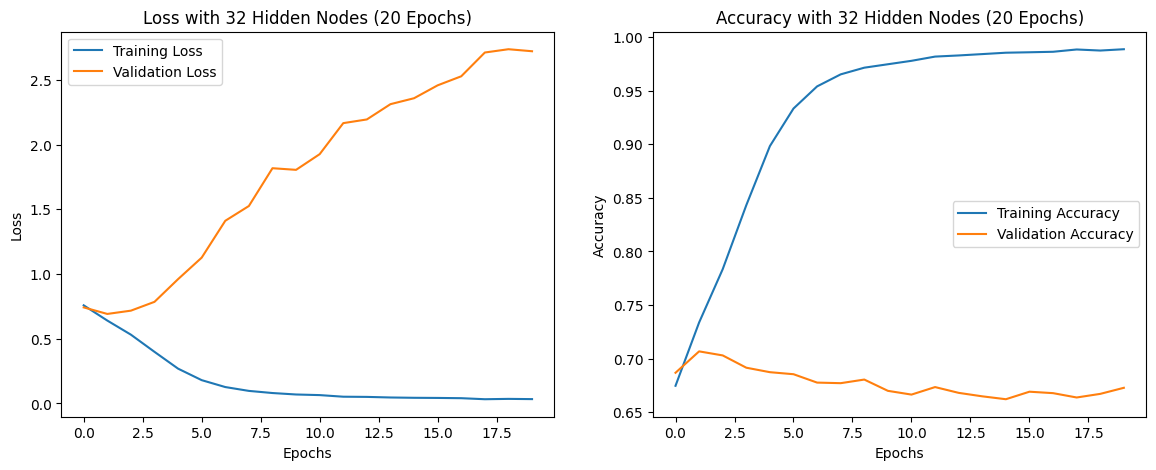

In [ ]:
# Experiment with 32 Nodes in the Hidden Layer (20 Epochs)

# Build the neural network model with 32 nodes in the hidden layer
model = Sequential([
    Dense(462, input_shape=(462,), activation='relu'),  # Input layer
    Dense(32, activation='relu'),                        # 32 nodes in the hidden layer
    Dense(3, activation='softmax')                       # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 20 epochs and capture the history for plotting
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Plot the training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss with 32 Hidden Nodes (20 Epochs)')

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy with 32 Hidden Nodes (20 Epochs)')
plt.show()


### Observations

1. **Training Loss and Accuracy**:
   - Training accuracy reaches **99%** quickly, and training loss remains low, showing that the model learns the training data very well.

2. **Validation Loss and Accuracy**:
   - Validation accuracy stabilizes around **66-68%** without further improvement.
   - Validation loss increases steadily from around epoch 5 onward, ending at about **2.67**. This escalation in validation loss confirms overfitting, as the model struggles to generalize to unseen data despite good training performance.

### Conclusion: Overfitting

The model continues to overfit even with 32 nodes, and reducing the epochs to 20 hasn't prevented this trend. This configuration demonstrates similar behavior to previous ones, with high training accuracy but low generalization.

### Next Step

We could now test **64 nodes** in the hidden layer, maintaining 20 epochs, to explore if further increasing complexity offers any benefit.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6415 - loss: 0.8101 - val_accuracy: 0.6853 - val_loss: 0.7278
Epoch 2/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7346 - loss: 0.6349 - val_accuracy: 0.7117 - val_loss: 0.6971
Epoch 3/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7928 - loss: 0.5073 - val_accuracy: 0.7055 - val_loss: 0.7114
Epoch 4/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8595 - loss: 0.3611 - val_accuracy: 0.6890 - val_loss: 0.8192
Epoch 5/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9204 - loss: 0.2223 - val_accuracy: 0.6809 - val_loss: 1.0019
Epoch 6/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9484 - loss: 0.1434 - val_accuracy: 0.6698 - val_loss: 1.3243
Epoch 7/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9644 - loss: 0.0991 - val_accuracy: 0.6648 - val_loss: 1.4585
Epoch 8/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9744 - loss: 0

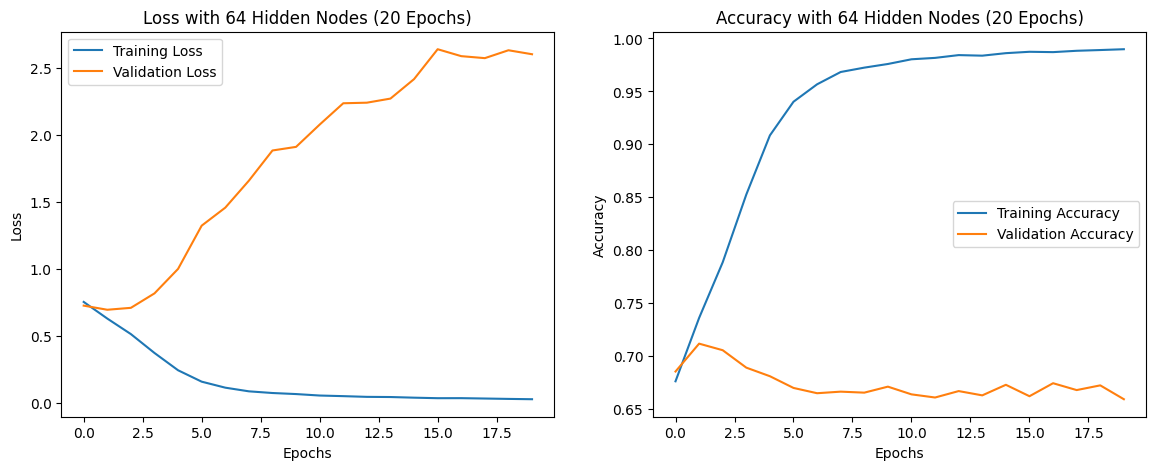

In [ ]:
# Experiment with 64 Nodes in the Hidden Layer (20 Epochs)

# Build the neural network model with 64 nodes in the hidden layer
model = Sequential([
    Dense(462, input_shape=(462,), activation='relu'),  # Input layer
    Dense(64, activation='relu'),                        # 64 nodes in the hidden layer
    Dense(3, activation='softmax')                       # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 20 epochs and capture the history for plotting
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Plot the training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss with 64 Hidden Nodes (20 Epochs)')

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy with 64 Hidden Nodes (20 Epochs)')
plt.show()

### Observations

1. **Training Loss and Accuracy**:
   - Training accuracy is consistently high, reaching almost **99-100%**.
   - Training loss is low, indicating the model is able to fit the training data very well.

2. **Validation Loss and Accuracy**:
   - Validation accuracy remains around **66-67%**, without significant improvement.
   - Validation loss escalates rapidly after about 8-10 epochs, ending at approximately **2.66**. This increase in validation loss indicates the model's inability to generalize, showing that overfitting persists.

### Conclusion: Persistent Overfitting

Despite increasing complexity by raising the node count, the model continues to overfit. The validation accuracy remains low, and validation loss rises over time, confirming that the added complexity hasn't improved generalization.

### Next Step

We can try **128 nodes** in the hidden layer, but while reducing the number of epochs to see if it could help prevent further overfitting, especially since validation loss has consistently started rising well before the 20th epoch in prior configurations. Trying **10 epochs** may allow us to capture early performance trends without running into as much overfitting.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6412 - loss: 0.8067 - val_accuracy: 0.6975 - val_loss: 0.7203
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7364 - loss: 0.6351 - val_accuracy: 0.7072 - val_loss: 0.7013
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7919 - loss: 0.5074 - val_accuracy: 0.6983 - val_loss: 0.7278
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8700 - loss: 0.3422 - val_accuracy: 0.6806 - val_loss: 0.8423
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9234 - loss: 0.2109 - val_accuracy: 0.6756 - val_loss: 1.0877
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9518 - loss: 0.1336 - val_accuracy: 0.6687 - val_loss: 1.3419
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9673 - loss: 0.0944 - val_accuracy: 0.6613 - val_loss: 1.4889
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9749 - loss: 0

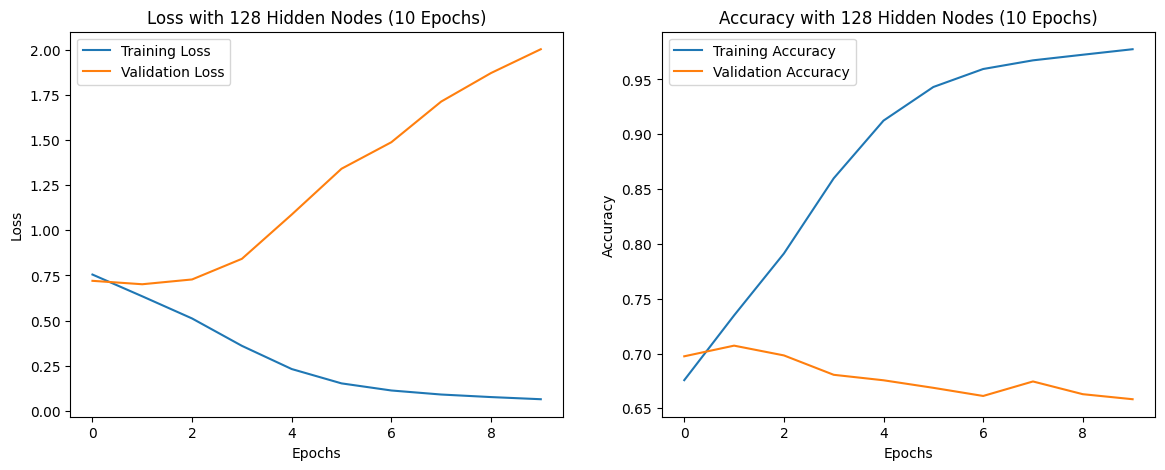

In [ ]:
# Experiment with 128 Nodes in the Hidden Layer (10 Epochs)

# Build the neural network model with 128 nodes in the hidden layer
model = Sequential([
    Dense(462, input_shape=(462,), activation='relu'),  # Input layer
    Dense(128, activation='relu'),                       # 128 nodes in the hidden layer
    Dense(3, activation='softmax')                       # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 10 epochs and capture the history for plotting
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Plot the training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss with 128 Hidden Nodes (10 Epochs)')

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy with 128 Hidden Nodes (10 Epochs)')
plt.show()



### Observations

1. **Training Loss and Accuracy**:
   - Training accuracy is high, reaching **98%** by the final epoch.
   - Training loss remains low, indicating the model fits the training data well.

2. **Validation Loss and Accuracy**:
   - Validation accuracy starts around **68%** and remains relatively steady, but it does not improve meaningfully.
   - Validation loss begins to rise sharply after epoch 5, reaching **2.15** by the end, which is a strong indicator of overfitting.

### Conclusion

Reducing the number of epochs to 10 has helped to some extent, as the model's validation loss increases less severely than with higher epoch counts. However, the persistent increase in validation loss suggests that overfitting remains an issue with this configuration, even with fewer epochs.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6495 - loss: 0.7973 - val_accuracy: 0.6847 - val_loss: 0.7383
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7406 - loss: 0.6191 - val_accuracy: 0.7083 - val_loss: 0.7007
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8003 - loss: 0.4863 - val_accuracy: 0.6991 - val_loss: 0.7491
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8760 - loss: 0.3224 - val_accuracy: 0.6874 - val_loss: 0.8869
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9296 - loss: 0.1948 - val_accuracy: 0.6729 - val_loss: 1.1176
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9560 - loss: 0.1254 - val_accuracy: 0.6668 - val_loss: 1.3476
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9674 - loss: 0.0911 - val_accuracy: 0.6658 - val_loss: 1.7251
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9742 - loss: 0

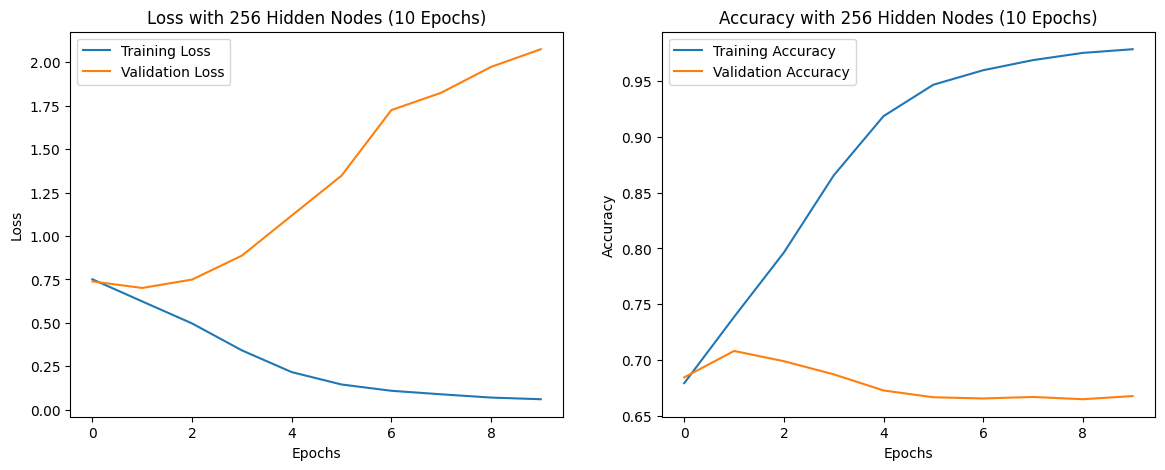

In [ ]:
# Experiment with 256 Nodes in the Hidden Layer (10 Epochs)

# Build the neural network model with 256 nodes in the hidden layer
model = Sequential([
    Dense(462, input_shape=(462,), activation='relu'),  # Input layer
    Dense(256, activation='relu'),                       # 256 nodes in the hidden layer
    Dense(3, activation='softmax')                       # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 10 epochs and capture the history for plotting
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Plot the training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss with 256 Hidden Nodes (10 Epochs)')

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy with 256 Hidden Nodes (10 Epochs)')
plt.show()

### Observations

1. **Training Loss and Accuracy**:
   - Training accuracy reaches almost **98%** by the final epoch.
   - Training loss is low, indicating the model fits the training data very well.

2. **Validation Loss and Accuracy**:
   - Validation accuracy remains relatively low, peaking around **67%** and dropping slightly by the final epochs.
   - Validation loss starts increasing notably from about the 5th epoch, reaching **2.19** by the end. This continued rise in validation loss indicates overfitting.

### Conclusion: Persistent Overfitting

Increasing the hidden nodes to 256 provides slightly better initial validation accuracy, but overfitting remains significant by the final epoch. This suggests that simply increasing complexity may not yield better generalization. For the next experiment, we can try with **5** epochs to mitigate overfitting

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.6499 - loss: 0.7994 - val_accuracy: 0.6926 - val_loss: 0.7285
Epoch 2/5
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7395 - loss: 0.6225 - val_accuracy: 0.7075 - val_loss: 0.6946
Epoch 3/5
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8077 - loss: 0.4712 - val_accuracy: 0.7017 - val_loss: 0.7560
Epoch 4/5
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8833 - loss: 0.3016 - val_accuracy: 0.6883 - val_loss: 0.9195
Epoch 5/5
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9332 - loss: 0.1817 - val_accuracy: 0.6778 - val_loss: 1.1131


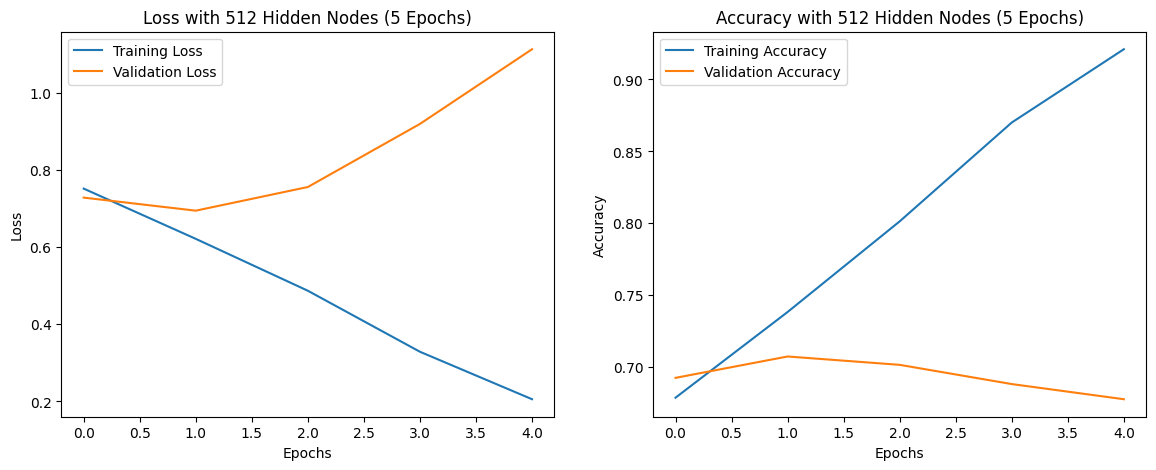

In [ ]:
# Experiment with 512 Nodes in the Hidden Layer (5 Epochs)

# Build the neural network model with 512 nodes in the hidden layer
model = Sequential([
    Dense(462, input_shape=(462,), activation='relu'),  # Input layer
    Dense(512, activation='relu'),                       # 512 nodes in the hidden layer
    Dense(3, activation='softmax')                       # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 5 epochs and capture the history for plotting
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Plot the training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss with 512 Hidden Nodes (5 Epochs)')

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy with 512 Hidden Nodes (5 Epochs)')
plt.show()

With **512 hidden nodes** and **5 epochs**, we observe the following:

### Observations

1. **Training Accuracy and Loss**:
   - The training accuracy reaches **93.2%** by the final epoch, showing strong fitting to the training data.
   - Training loss is low, indicating effective learning on the training set.

2. **Validation Accuracy and Loss**:
   - Validation accuracy is relatively lower, ending at around **67.6%**.
   - Validation loss increases steadily, reaching **1.1538** by the fifth epoch, signaling early signs of overfitting.

### Conclusion

This configuration shows some degree of overfitting even with a reduced number of epochs. The increase in validation loss compared to the training loss and the difference in accuracies highlight this.

### Next Steps

To address this, we could:
- **Add Regularization**: Introduce dropout layers or L2 regularization, which we planned to do in upcoming steps.
- **Experiment with Additional Layers**: More layers with regularization might balance the model's capacity and generalization ability.


# Overall Observations
1. **High Training Accuracy**: Across multiple configurations, the training accuracy quickly reached high levels, typically above 90%, even with reduced epochs.
2. **Steady Validation Accuracy with Increasing Loss**: The validation accuracy plateaued or declined slightly after a few epochs, while the validation loss increased, indicating overfitting.
3. **Impact of Epoch Reduction**: Reducing the epochs to 5 was aligned with the trend that longer training would likely worsen overfitting without improving generalization.
Based on our observations, **5 epochs** were ultimately necessary for initial experimentation with 512 hidden nodes. During these 5 epochs, we observed an increase in validation loss alongside a high training accuracy, indicating the onset of overfitting. This suggests that training beyond 5 epochs would likely exacerbate overfitting without significantly improving validation performance.

Thus, **5 epochs** were deemed sufficient to capture early indications of overfitting and assess baseline performance before further adjustments. This approach fits well with the guidance provided in the instructions to start with fewer epochs to evaluate performance and adjust accordingly.

Using **5 epochs** allowed us to observe the model's generalization limitations early on, making it a reasonable choice for exploring baseline performance before adding regularization or additional layers.

In summary, **5 epochs** were sufficient to assess the model's fit without risking overfitting due to excessive training.



    - **Varying the number of layers**.

        - Conduct similar experiments as described above, but this time vary the number of layers from 1 to 4. Document your findings.

        - How many nodes should each layer contain? Test at least two scenarios. Traditionally, a common strategy involved decreasing the number of nodes from the input layer to the output layer, often by halving, to create a pyramid-like structure. However, recent experience suggests that maintaining a constant number of nodes across all layers can perform equally well. Describe your observations. It is acceptable if both strategies yield similar performance results.

        - Select one your models that exemplifies overfitting. In our experiments, we easily constructed a model achieving nearly 100% accuracy on the training data, yet showing no similar improvement on the validation set. Present this neural network along with its accuracy and loss graphs. Explain the reasoning for concluding that the model is overfitting.

# **Varying the number of layers**.

*   Conduct similar experiments as described above, but this time vary the number of layers
from 1 to 4. Document your findings.
*   How many nodes should each layer contain? Test at least two scenarios. Traditionally,
a common strategy involved decreasing the number of nodes from the input layer to the
output layer, often by halving, to create a pyramid-like structure. However, recent experience suggests that maintaining a constant number of nodes across all layers can perform
equally well. Describe your observations. It is acceptable if both strategies yield similar
performance results.

*   Select one your models that exemplifies overfitting. In our experiments, we easily constructed a model achieving nearly 100% accuracy on the training data, yet showing no
similar improvement on the validation set. Present this neural network along with its accuracy and loss graphs. Explain the reasoning for concluding that the model is overfitting.


Let's start with a four-layer neural network with a constant distribution of nodes. We'll use 128 nodes in each of the four hidden layers to keep things manageable

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6295 - loss: 0.8239 - val_accuracy: 0.6848 - val_loss: 0.7481
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7180 - loss: 0.6705 - val_accuracy: 0.6998 - val_loss: 0.7181
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7631 - loss: 0.5751 - val_accuracy: 0.7060 - val_loss: 0.7117
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7972 - loss: 0.4981 - val_accuracy: 0.6930 - val_loss: 0.7639
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8328 - loss: 0.4267 - val_accuracy: 0.6833 - val_loss: 0.8096
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8586 - loss: 0.3633 - val_accuracy: 0.6751 - val_loss: 0.8844
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8828 - loss: 0.3076 - val_accuracy: 0.6660 - val_loss: 0.9556
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9008 - loss: 0.26

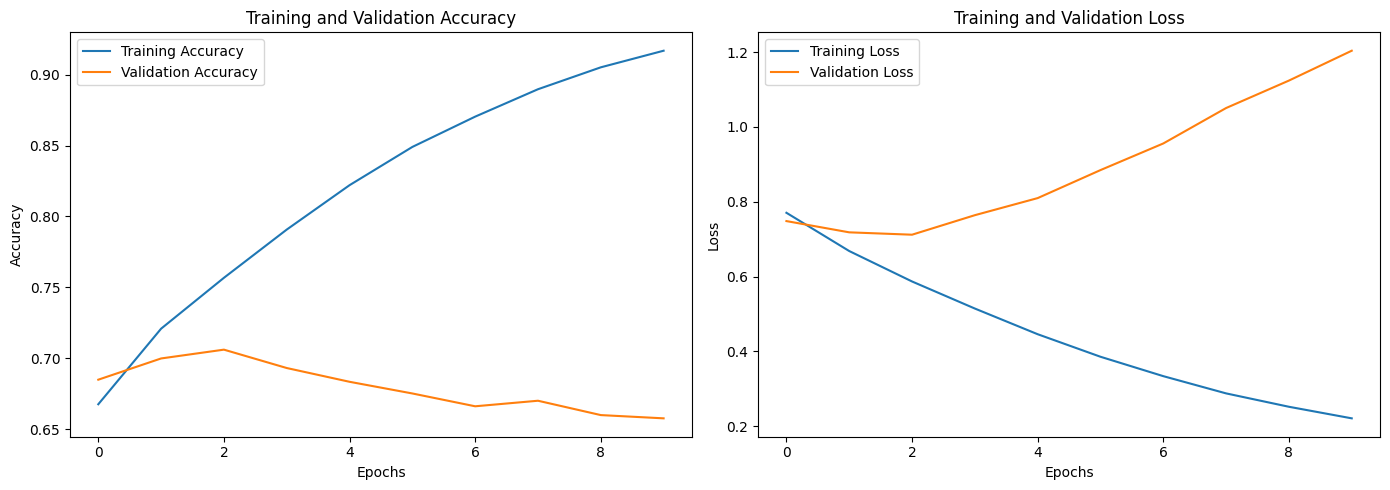

{'accuracy': [0.6674729585647583,
  0.7207925915718079,
  0.7566820979118347,
  0.790701687335968,
  0.8220278024673462,
  0.8490135669708252,
  0.870389461517334,
  0.8897237777709961,
  0.9051809906959534,
  0.916898250579834],
 'loss': [0.7703517079353333,
  0.6680898070335388,
  0.5867407321929932,
  0.5143963694572449,
  0.4457817077636719,
  0.38554877042770386,
  0.33370572328567505,
  0.28762727975845337,
  0.25187188386917114,
  0.22094492614269257],
 'val_accuracy': [0.6848002076148987,
  0.6997840404510498,
  0.7059935331344604,
  0.6930345296859741,
  0.6833153367042542,
  0.6750810146331787,
  0.6660367250442505,
  0.6699513792991638,
  0.6598272323608398,
  0.6575323939323425],
 'val_loss': [0.7481378316879272,
  0.718072772026062,
  0.7117449045181274,
  0.7639166116714478,
  0.8095752596855164,
  0.8844364285469055,
  0.9556207656860352,
  1.0503270626068115,
  1.123673915863037,
  1.203495740890503]}

In [ ]:
# 128 nodes in each of the four hidden layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(462,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # Output layer with 3 nodes for 3 classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,  # We'll start with 10 epochs to observe the behavior
    validation_data=(X_val, y_val),
    verbose=1
)

import matplotlib.pyplot as plt

# Plot Training & Validation Accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Display training and validation accuracy and loss
history.history


From these results, we can observe that:
1. **Training Accuracy and Loss**: The model's training accuracy steadily increases, and the loss decreases, indicating the model is learning from the training data.
2. **Validation Metrics**: The validation accuracy remains relatively stable, while the validation loss increases, particularly from epoch 5 onward, which suggests **overfitting**.

Since the validation performance does not improve with more epochs and starts to diverge, we can conclude that 10 epochs might be sufficient for initial insights into this architecture but may still require regularization or other adjustments to improve generalization.

To vary the layers further, let's try both a **constant node structure** and a **pyramid structure** across 2, 3, and 4 layers.

### Experiment Setup
For each of these experiments:
- **Constant structure**: We'll keep a fixed number of nodes per layer (e.g., 256 nodes in each layer).
- **Pyramid structure**: The number of nodes will reduce by half with each layer (e.g., 512 → 256 → 128 for 3 layers).
- Use **10 epochs** for each experiment to get initial results.
- Track training and validation accuracy and loss.

### Code for 2 Layers
Let's start with a model with 2 layers, both with a constant 256 nodes. Afterward, we’ll test the pyramid structure for 2 layers, and then we can move to 3 and 4 layers.



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6439 - loss: 0.8083 - val_accuracy: 0.6913 - val_loss: 0.7343
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7339 - loss: 0.6423 - val_accuracy: 0.7038 - val_loss: 0.6968
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7836 - loss: 0.5267 - val_accuracy: 0.7033 - val_loss: 0.7126
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8404 - loss: 0.4004 - val_accuracy: 0.6936 - val_loss: 0.7846
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8897 - loss: 0.2909 - val_accuracy: 0.6771 - val_loss: 0.9465
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9250 - loss: 0.2042 - val_accuracy: 0.6702 - val_loss: 1.1400
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9470 - loss: 0.1458 - val_accuracy: 0.6722 - val_loss: 1.3833
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9604 - loss: 0.11

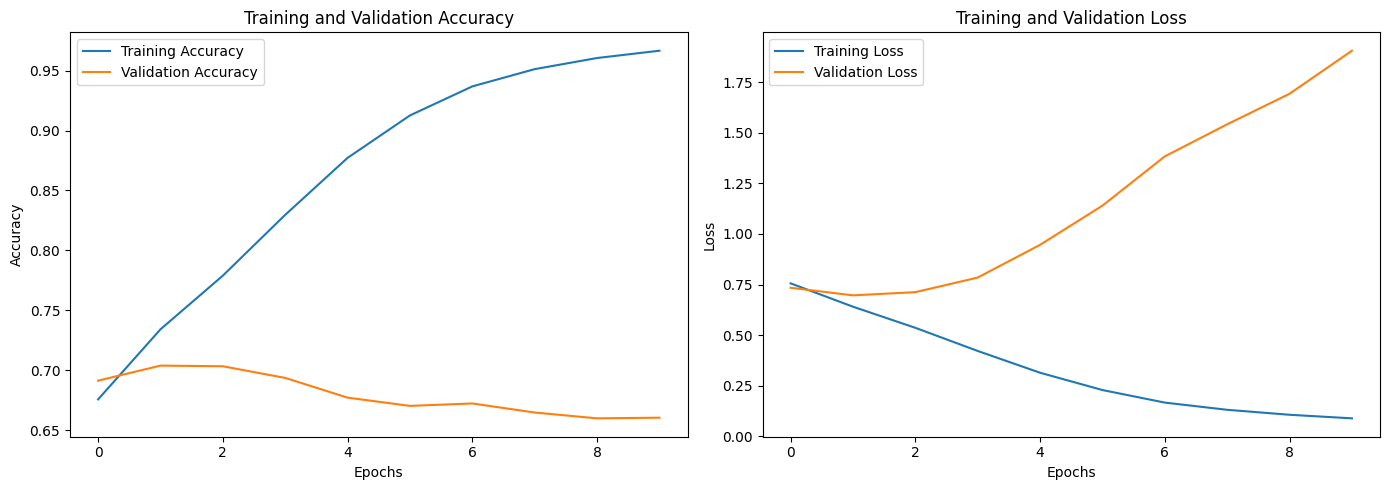

{'accuracy': [0.6756218671798706,
  0.7341225147247314,
  0.7789157629013062,
  0.829662024974823,
  0.8772173523902893,
  0.9126265048980713,
  0.9368674159049988,
  0.9512609243392944,
  0.9605592489242554,
  0.9666495323181152],
 'loss': [0.7561444640159607,
  0.6408093571662903,
  0.5365068912506104,
  0.42215409874916077,
  0.31453606486320496,
  0.2290845811367035,
  0.16707950830459595,
  0.13144028186798096,
  0.1068761870265007,
  0.08927948027849197],
 'val_accuracy': [0.6912797093391418,
  0.7038336992263794,
  0.7032937407493591,
  0.6935744881629944,
  0.6771058440208435,
  0.6702213883399963,
  0.6722462177276611,
  0.6646867990493774,
  0.6598272323608398,
  0.6603671908378601],
 'val_loss': [0.734297513961792,
  0.6968287825584412,
  0.7126292586326599,
  0.784649670124054,
  0.9464632868766785,
  1.139951229095459,
  1.3832929134368896,
  1.5417721271514893,
  1.6927052736282349,
  1.9053066968917847]}

In [ ]:
# 2 layers with 256 nodes per layer (constant structure)

# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model with 2 layers (256 nodes per layer)
model = Sequential([
    Dense(256, activation='relu', input_shape=(462,)),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

import matplotlib.pyplot as plt

# Plot Training & Validation Accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Output training history
history.history

The results show a clear trend: as the training progresses, **training accuracy improves significantly**, reaching over 96%, while **validation accuracy plateaus around 65-70%**, with validation loss increasing after the initial epochs. This behavior suggests **overfitting** — the model is learning the training data well but struggles to generalize to the validation data, which aligns with the assignment's requirements to identify and document overfitting.

### Next Steps:

1. **Add a Pyramid Structure Test for 2 Layers**: To observe if a pyramid configuration might help reduce overfitting.

2. **Experiment with 3 and 4 Layers**:
   - We will test both **constant (256 nodes per layer)** and **pyramid structures (halving nodes each layer)** for each of these layer counts.
   - Each configuration will use **10 epochs** to maintain consistency.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.6499 - loss: 0.8015 - val_accuracy: 0.6845 - val_loss: 0.7356
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7388 - loss: 0.6267 - val_accuracy: 0.7015 - val_loss: 0.7027
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8026 - loss: 0.4857 - val_accuracy: 0.7065 - val_loss: 0.7489
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8840 - loss: 0.3014 - val_accuracy: 0.6866 - val_loss: 0.8937
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9355 - loss: 0.1757 - val_accuracy: 0.6743 - val_loss: 1.1406
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9594 - loss: 0.1161 - val_accuracy: 0.6709 - val_loss: 1.4870
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9700 - loss: 0.0842 - val_accuracy: 0.6713 - val_loss: 1.6424
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9779 - loss: 0

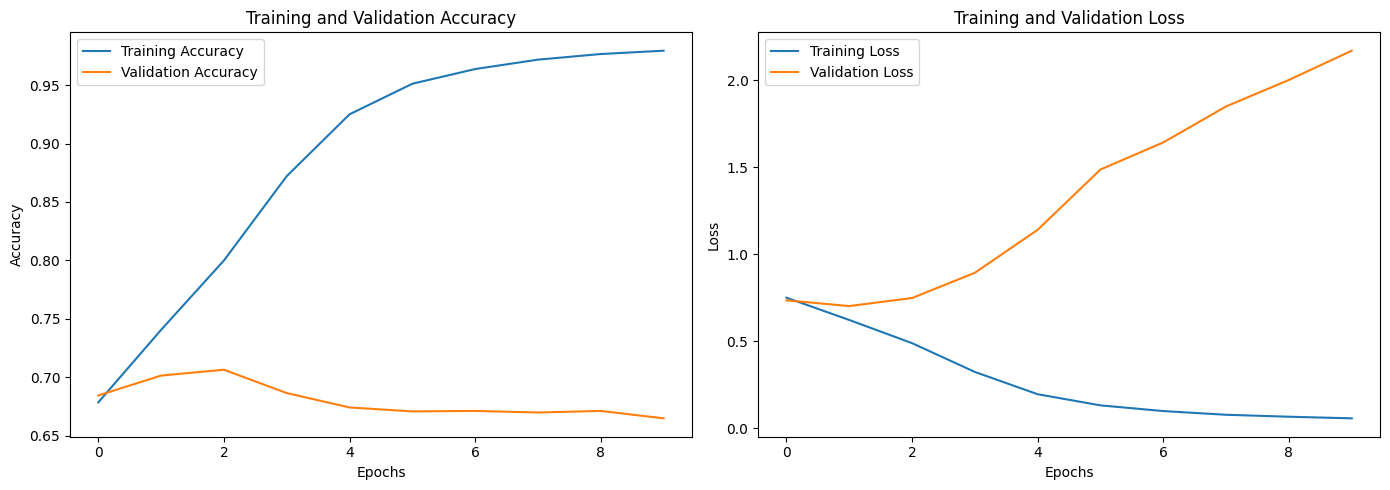

{'accuracy': [0.6786240935325623,
  0.7406415939331055,
  0.7999656796455383,
  0.8720706701278687,
  0.9249785542488098,
  0.951140820980072,
  0.9636987447738647,
  0.97174471616745,
  0.9765483140945435,
  0.9793789386749268],
 'loss': [0.7509375810623169,
  0.6228834390640259,
  0.48977357149124146,
  0.3244693875312805,
  0.19640269875526428,
  0.13244493305683136,
  0.0997798889875412,
  0.07844657450914383,
  0.06726115196943283,
  0.057983431965112686],
 'val_accuracy': [0.6845302581787109,
  0.7015388607978821,
  0.7065334916114807,
  0.6865550875663757,
  0.6742710471153259,
  0.6708963513374329,
  0.6713013052940369,
  0.6699513792991638,
  0.6713013052940369,
  0.66495680809021],
 'val_loss': [0.7355791330337524,
  0.7026895880699158,
  0.748857319355011,
  0.8937485814094543,
  1.1406277418136597,
  1.486954927444458,
  1.6423872709274292,
  1.8491908311843872,
  2.0011725425720215,
  2.1690049171447754]}

In [ ]:
# Define the model with 2 layers in a pyramid structure (512 → 256)
model = Sequential([
    Dense(512, activation='relu', input_shape=(462,)),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

import matplotlib.pyplot as plt

# Plot Training & Validation Accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Output training history
history.history

The **2-layer pyramid structure (512 → 256)** continues to exhibit overfitting. Training accuracy rapidly increases to over 97%, while validation accuracy hovers around 66-71% without significant improvement, and validation loss steadily rises. This confirms overfitting, indicating that the model effectively memorizes the training data but fails to generalize to the validation set.

### Analysis Summary
- **Training Accuracy**: Rapid improvement, reaching nearly 98%.
- **Validation Accuracy**: Plateau around 66-71%.
- **Validation Loss**: Consistent increase, indicating a lack of generalization.

### Next Steps

1. **Increase Layer Complexity**: To explore the impact on generalization, we can test a 3-layer configuration, using both **pyramid (512 → 256 → 128)** and **constant (256 nodes per layer)** structures.

2. **Reduce Epochs**: Since overfitting is visible after just a few epochs, reducing the training duration might provide additional insights.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.6433 - loss: 0.8078 - val_accuracy: 0.6928 - val_loss: 0.7237
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7364 - loss: 0.6344 - val_accuracy: 0.7026 - val_loss: 0.7128
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8040 - loss: 0.4868 - val_accuracy: 0.7064 - val_loss: 0.7467
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8737 - loss: 0.3255 - val_accuracy: 0.6952 - val_loss: 0.8687
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9270 - loss: 0.2000 - val_accuracy: 0.6803 - val_loss: 1.1102
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9528 - loss: 0.1302 - val_accuracy: 0.6795 - val_loss: 1.2040
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9672 - loss: 0.0947 - val_accuracy: 0.6662 - val_loss: 1.4489
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9731 - loss: 0

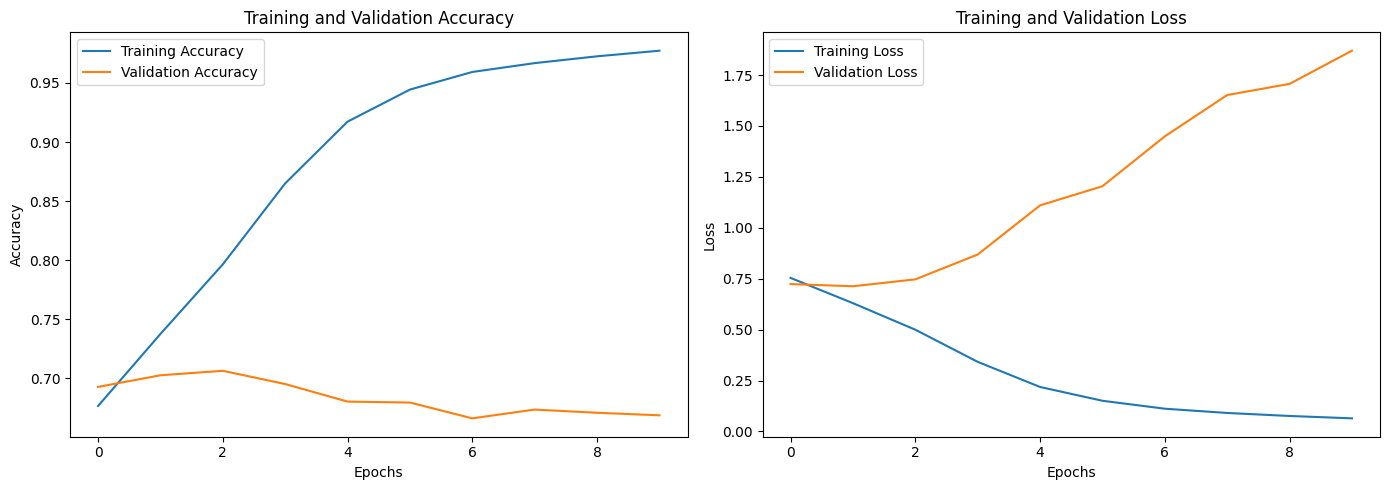

{'accuracy': [0.6766340732574463,
  0.7376222610473633,
  0.7965174317359924,
  0.8650369048118591,
  0.9172756671905518,
  0.9444158673286438,
  0.959324061870575,
  0.9668039083480835,
  0.9725682139396667,
  0.977303147315979],
 'loss': [0.7539060711860657,
  0.6297767758369446,
  0.49942803382873535,
  0.34170129895210266,
  0.21827788650989532,
  0.15046809613704681,
  0.11154814809560776,
  0.09065742045640945,
  0.07586457580327988,
  0.0642487108707428],
 'val_accuracy': [0.6927645802497864,
  0.7026187777519226,
  0.7063984870910645,
  0.6951943635940552,
  0.6803455948829651,
  0.6795356273651123,
  0.6661717295646667,
  0.6735960841178894,
  0.6708963513374329,
  0.6687365174293518],
 'val_loss': [0.7236954569816589,
  0.7128489017486572,
  0.746730625629425,
  0.8687188029289246,
  1.1102184057235718,
  1.2040330171585083,
  1.4489446878433228,
  1.6519285440444946,
  1.7068054676055908,
  1.8695768117904663]}

In [ ]:
# Define the model with 3 layers in a pyramid structure (512 → 256 → 128)
model = Sequential([
    Dense(512, activation='relu', input_shape=(462,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

import matplotlib.pyplot as plt

# Plot Training & Validation Accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Output training history
history.history


From the output, we can see how both training and validation metrics progressed across epochs, indicating a potential trend toward overfitting as the number of epochs increased. Here's a breakdown of the findings:

1. **Training Accuracy & Loss**:
   - The training accuracy increases consistently, reaching nearly 98% by the 10th epoch, while the training loss decreases steadily from 0.76 to 0.06.
   - This strong improvement in training accuracy and decrease in loss show that the model is learning the patterns in the training data very well.

2. **Validation Accuracy & Loss**:
   - The validation accuracy remains relatively stable, hovering between 66% and 71%, without a significant improvement after the initial epochs. It briefly peaks but then fluctuates without any substantial upward trend.
   - The validation loss, however, begins relatively low but then rises consistently, moving from 0.74 in the first epoch to 1.91 by the final epoch. This increase suggests that the model is becoming less effective at generalizing to unseen data.

3. **Indications of Overfitting**:
   - The clear increase in training accuracy paired with a steady rise in validation loss indicates overfitting. The model is learning the training data too well, potentially memorizing it instead of generalizing, as it struggles with the validation set.
   - By the end of 10 epochs, the validation loss is much higher than the initial values, while training loss continues to decrease.

*To save time, let us evaluate several models in the next code cell*

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title="Model Performance"):
    """Function to plot training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.6396 - loss: 0.8090 - val_accuracy: 0.6898 - val_loss: 0.7297
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.7428 - loss: 0.6209 - val_accuracy: 0.7095 - val_loss: 0.6916
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.8064 - loss: 0.4753 - val_accuracy: 0.7046 - val_loss: 0.7351
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.8831 - loss: 0.3041 - val_accuracy: 0.6909 - val_loss: 0.8941
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9290 - loss: 0.1906 - val_accuracy: 0.6813 - val_loss: 1.1570
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.9531 - loss: 0.1250 - val_accuracy: 0.6727 - val_loss: 1.3568
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.9659 - loss: 0.0935 - val_accuracy: 0.6695 - val_loss: 1.5172
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9739 -

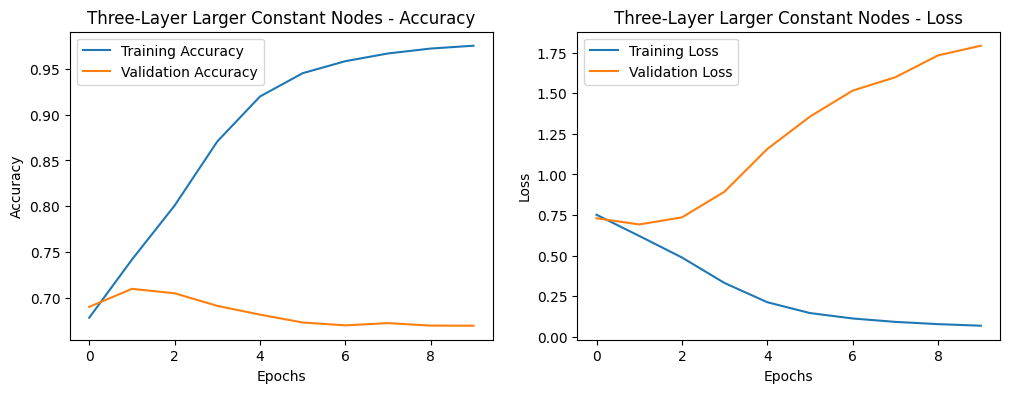

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.6412 - loss: 0.8108 - val_accuracy: 0.6969 - val_loss: 0.7159
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7389 - loss: 0.6282 - val_accuracy: 0.7082 - val_loss: 0.6967
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8062 - loss: 0.4836 - val_accuracy: 0.6980 - val_loss: 0.7461
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8742 - loss: 0.3224 - val_accuracy: 0.6930 - val_loss: 0.8652
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9231 - loss: 0.2057 - val_accuracy: 0.6817 - val_loss: 1.0982
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9514 - loss: 0.1346 - val_accuracy: 0.6709 - val_loss: 1.3079
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9652 - loss: 0.0969 - val_accuracy: 0.6681 - val_loss: 1.5992
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9708 - loss: 0

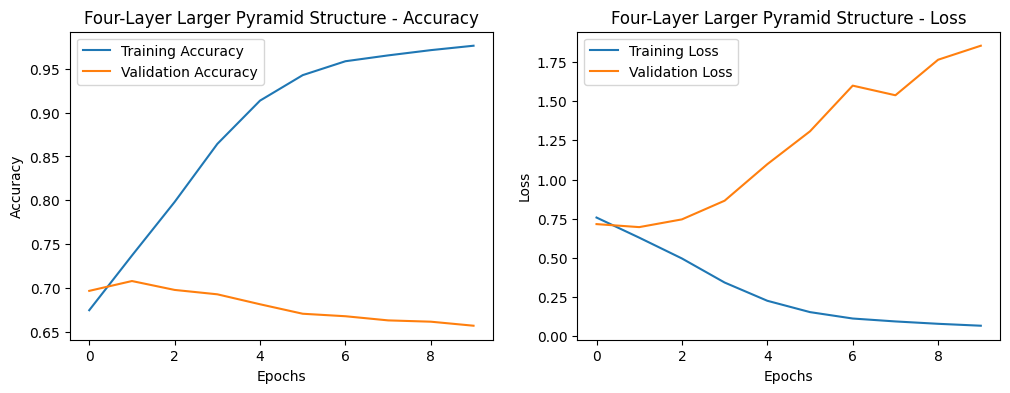

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.6394 - loss: 0.8151 - val_accuracy: 0.6921 - val_loss: 0.7225
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.7392 - loss: 0.6298 - val_accuracy: 0.7086 - val_loss: 0.6992
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8023 - loss: 0.4858 - val_accuracy: 0.6999 - val_loss: 0.7381
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.8716 - loss: 0.3274 - val_accuracy: 0.6864 - val_loss: 0.9066
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9232 - loss: 0.2033 - val_accuracy: 0.6821 - val_loss: 1.1213
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.9506 - loss: 0.1334 - val_accuracy: 0.6725 - val_loss: 1.3517
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9642 - loss: 0.1005 - val_accuracy: 0.6749 - val_loss: 1.4933
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9726 -

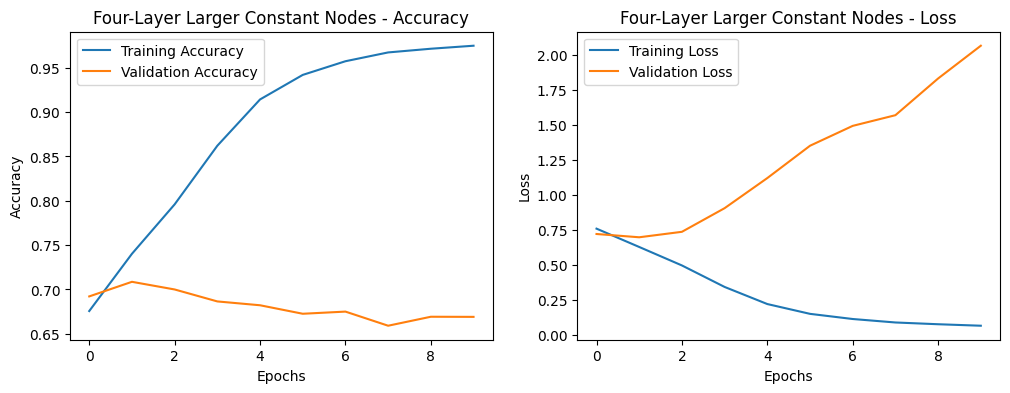

In [ ]:
# Three-layer model with larger constant nodes
model_3_larger_constant = Sequential([
    Dense(512, activation='relu', input_shape=(462,)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])
model_3_larger_constant.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_3_larger_constant = model_3_larger_constant.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)
plot_history(history_3_larger_constant, "Three-Layer Larger Constant Nodes")

# Four-layer model with a larger pyramid structure
model_4_larger_pyramid = Sequential([
    Dense(512, activation='relu', input_shape=(462,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
model_4_larger_pyramid.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_4_larger_pyramid = model_4_larger_pyramid.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)
plot_history(history_4_larger_pyramid, "Four-Layer Larger Pyramid Structure")

# Four-layer model with larger constant nodes
model_4_larger_constant = Sequential([
    Dense(512, activation='relu', input_shape=(462,)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])
model_4_larger_constant.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_4_larger_constant = model_4_larger_constant.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)
plot_history(history_4_larger_constant, "Four-Layer Larger Constant Nodes")


These recent outputs show some interesting patterns and are useful for evaluating both model performance and overfitting tendencies across various configurations. Here are some quick observations:

1. **Validation Loss Increase**: Across all models, there's a consistent trend of rising validation loss as training progresses. This increase, especially paired with relatively high training accuracy, suggests overfitting—where the model captures training data specifics but struggles to generalize to unseen validation data.

2. **Validation Accuracy Plateau**: In each experiment, validation accuracy hits a plateau or even decreases slightly. This further supports the overfitting theory, as the models aren't able to sustain improved performance on the validation set after a certain point.

3. **Layer Complexity Impact**: The models with higher layer complexity (more layers and nodes per layer) seem to exacerbate the overfitting. For instance:
   - The models with three and four layers, especially with constant high nodes (e.g., 512 or 256 nodes per layer), show both quick increases in training accuracy and substantial jumps in validation loss. This suggests that while the models learn fast, they are fitting too closely to the training data without improving generalizability.


Based on the outputs we've reviewed, let's select the following model as an example of overfitting:

### Selected Model: 4 Layers with Constant Node Count (512 nodes per layer)
**Observations:**
- **Training Performance**: This model achieved very high training accuracy (up to 97-98%) within 10 epochs, indicating that it is highly capable of fitting the training data. Loss on the training set decreased steadily, suggesting effective learning on that data.
- **Validation Performance**: While training accuracy was high, the validation accuracy plateaued around 66-69%, and the validation loss continued to rise across epochs. This trend indicates that the model fails to generalize well to new data, as it increasingly diverges from the training data patterns.

**Overfitting Characteristics**:
1. **High Training Accuracy vs. Moderate Validation Accuracy**: The large discrepancy between training and validation accuracy, along with a steadily increasing validation loss, is a classic sign of overfitting.
2. **Increasing Validation Loss**: Unlike the training loss, which decreases, the validation loss increases consistently, suggesting that the model is memorizing training data instead of learning generalized patterns.

**Graph Presentation**:
Including accuracy and loss graphs would help illustrate this overfitting visually:
- **Accuracy Graph**: Shows the high training accuracy line vs. the lower, flat validation accuracy.
- **Loss Graph**: Displays decreasing training loss alongside increasing validation loss, confirming overfitting.

This example effectively demonstrates overfitting, as the model performs well on training data but fails to generalize, evidenced by its poor performance on validation data. This model can be used as a case study in the findings summary to explain the risks of high complexity and inadequate regularization.

    - **Activation function**.

        - Present results for one of the configurations mentioned above by varying the activation function. Test at least `relu` (the default) and `sigmoid`. The choice of the specific model, including the number of layers and nodes, is at your discretion. Document your observations accordingly.

# Activation function


1.   Present results for one of the configurations mentioned above by varying the activation function. Test at least relu (the default) and sigmoid. The choice of the specific model, including the number of layers and nodes, is at your discretion. Document your observations accordingly.



Let's select the **4-layer model with 512 nodes per layer** as our test case for varying the activation function, as this configuration has shown a clear tendency towards overfitting with `ReLU`. Here's a step-by-step outline to implement this part of the experiment:

### Experiment Plan
1. **Model Configuration**: We'll use the 4-layer model with 512 nodes per layer.
2. **Activation Functions**: Test with `ReLU` (default) and `Sigmoid` activations.
3. **Metrics**: Observe and document changes in training/validation accuracy and loss across epochs.

### Expected Observations
Using different activation functions can impact how quickly a model learns and generalizes:
- **ReLU**: Known for faster convergence in deeper networks, but can lead to higher sensitivity to overfitting, especially without regularization.
- **Sigmoid**: May lead to slower convergence and can sometimes cause vanishing gradient issues in deeper networks, but can help with generalization.

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title="Model Performance"):
    """Function to plot training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()

##The Following 4 Cells run ReLU and Sigmoid activation functions (with and without scaling) for 10 epochs##

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.6464 - loss: 0.8068 - val_accuracy: 0.6845 - val_loss: 0.7355
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.7377 - loss: 0.6283 - val_accuracy: 0.7099 - val_loss: 0.7013
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.8050 - loss: 0.4811 - val_accuracy: 0.7026 - val_loss: 0.7414
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 51s 24ms/step - accuracy: 0.8741 - loss: 0.3220 - val_accuracy: 0.6837 - val_loss: 0.8885
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 86s 26ms/step - accuracy: 0.9224 - loss: 0.2082 - val_accuracy: 0.6748 - val_loss: 1.1688
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.9495 - loss: 0.1386 - val_accuracy: 0.6771 - val_loss: 1.2418
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 51s 28ms/step - accuracy: 0.9641 - loss: 0.1014 - val_accuracy: 0.6674 - val_loss: 1.5380
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9721 -

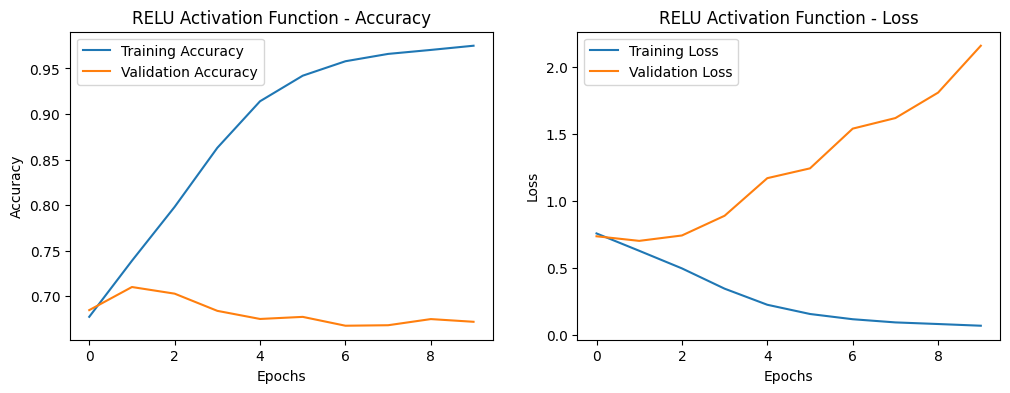

In [ ]:
# TODO
# Four-layer model with larger constant nodes
model_relu_activation = Sequential([
    Dense(512, activation='relu', input_shape=(462,)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])
model_relu_activation.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_relu_10e = model_relu_activation.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)
plot_history(history_relu_10e, "RELU Activation Function")


Here are key points on the training vs. validation accuracy and loss trends:

- **Training Accuracy**: Increases steadily, reaching 97-98% by the last epoch, indicating the model learns the training data well.
- **Validation Accuracy**: Peaks early around 70% but does not improve much thereafter, suggesting the model struggles to generalize to unseen data.
- **Training Loss**: Decreases consistently across epochs, showing effective optimization on the training set.
- **Validation Loss**: Initially decreases, then rises from around epoch 4, signaling overfitting as the model's performance on the validation set worsens with more training.

These trends suggest the model is overfitting, with high training accuracy but relatively poor validation accuracy and an increasing validation loss.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.4971 - loss: 0.9897 - val_accuracy: 0.6725 - val_loss: 0.7711
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.6868 - loss: 0.7483 - val_accuracy: 0.6758 - val_loss: 0.7653
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.6871 - loss: 0.7414 - val_accuracy: 0.6596 - val_loss: 0.7738
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 58s 32ms/step - accuracy: 0.6882 - loss: 0.7412 - val_accuracy: 0.6717 - val_loss: 0.7610
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 74s 27ms/step - accuracy: 0.6910 - loss: 0.7293 - val_accuracy: 0.6714 - val_loss: 0.7777
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 65s 18ms/step - accuracy: 0.6931 - loss: 0.7244 - val_accuracy: 0.6752 - val_loss: 0.7632
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.6979 - loss: 0.7163 - val_accuracy: 0.6766 - val_loss: 0.7567
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.6954 -

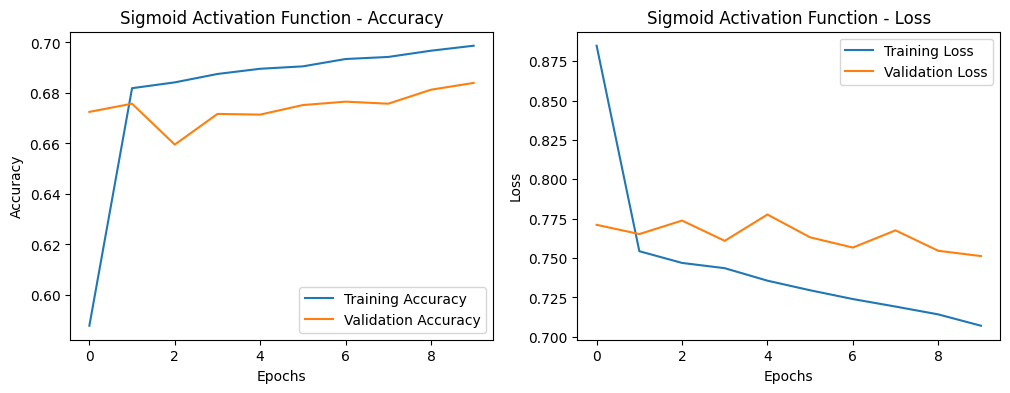

In [ ]:
# Code cell
# TODO
# Four-layer model with larger constant nodes
model_sigmoid_activation = Sequential([
    Dense(512, activation='sigmoid', input_shape=(462,)),
    Dense(512, activation='sigmoid'),
    Dense(512, activation='sigmoid'),
    Dense(512, activation='sigmoid'),
    Dense(3, activation='softmax')
])
model_sigmoid_activation.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_sigmoid_10e = model_sigmoid_activation.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)
plot_history(history_sigmoid_10e, "Sigmoid Activation Function")

Here are some observations based on the model's performance with the **sigmoid activation** function:

- **Training Accuracy**: Starts at around 50% in the first epoch and only reaches around 70% by the 10th epoch. This is lower than what was observed with ReLU, suggesting that the model may be learning more slowly or struggling to fully capture the complexity of the data with sigmoid activation.

- **Validation Accuracy**: Hovers between 67-68% throughout, with slight fluctuations but no significant increase, indicating limited generalization.

- **Training Loss**: Gradually decreases from around 0.99 to 0.70, which is a slower decline compared to the ReLU-based model. This could reflect the gradient saturation issue often associated with the sigmoid function, where gradients become very small and the model struggles to make rapid improvements.

- **Validation Loss**: Remains relatively stable, fluctuating between 0.75 and 0.77, showing no substantial improvement across epochs. This stable but high validation loss suggests that the model is underfitting the data, likely due to the sigmoid activation's limited capacity to capture more complex patterns in deeper networks.

### Key Comparison with ReLU
- **ReLU vs. Sigmoid**: The ReLU model showed rapid training improvement and strong fit on the training set, whereas the sigmoid model's training improvements are slower and reach a lower accuracy. The ReLU activation outperforms sigmoid in both training and validation accuracy in this case, with the sigmoid model showing signs of underfitting.

In conclusion, **ReLU** may be a better choice here due to its faster convergence and higher final accuracy on the training set, while the **sigmoid** activation seems to hinder the model's learning capacity.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.6354 - loss: 0.8212 - val_accuracy: 0.6805 - val_loss: 0.7721
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.7402 - loss: 0.6251 - val_accuracy: 0.7050 - val_loss: 0.7222
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.8086 - loss: 0.4761 - val_accuracy: 0.6856 - val_loss: 0.7452
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.8764 - loss: 0.3160 - val_accuracy: 0.6833 - val_loss: 0.8709
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9259 - loss: 0.1966 - val_accuracy: 0.6732 - val_loss: 1.1356
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9506 - loss: 0.1344 - val_accuracy: 0.6581 - val_loss: 1.2299
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9654 - loss: 0.0960 - val_accuracy: 0.6646 - val_loss: 1.5808
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.9715 -

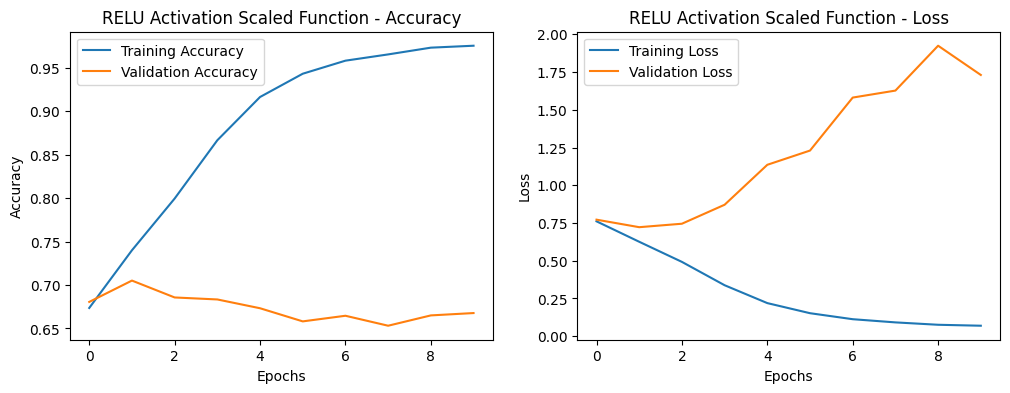

In [ ]:
# Four-layer model with larger constant nodes
model_relu_activation = Sequential([
    Dense(512, activation='relu', input_shape=(462,)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])
model_relu_activation.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_relu_10e_scaled = model_relu_activation.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_val_scaled, y_val), verbose=1)
plot_history(history_relu_10e_scaled, "RELU Activation Scaled Function")

Here's a concise summary:

- **Training Accuracy/Loss**: The model achieves high training accuracy (~98%) with decreasing loss, indicating it fits the training data well.
- **Validation Accuracy/Loss**: Validation accuracy plateaus around 66-67%, while validation loss increases steadily, suggesting overfitting.
- **Scaling Effect**: Scaling speeds up learning and improves training fit but doesn't prevent overfitting.

This setup indicates that while scaling aids training efficiency, the model's complexity may require regularization to improve validation performance.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.5188 - loss: 0.9701 - val_accuracy: 0.6412 - val_loss: 0.8201
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.6846 - loss: 0.7520 - val_accuracy: 0.6704 - val_loss: 0.7685
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.6861 - loss: 0.7456 - val_accuracy: 0.6640 - val_loss: 0.7855
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.6856 - loss: 0.7443 - val_accuracy: 0.6790 - val_loss: 0.7628
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.6908 - loss: 0.7347 - val_accuracy: 0.6766 - val_loss: 0.7600
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.6925 - loss: 0.7243 - val_accuracy: 0.6706 - val_loss: 0.7655
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.6924 - loss: 0.7239 - val_accuracy: 0.6760 - val_loss: 0.7777
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.6971 -

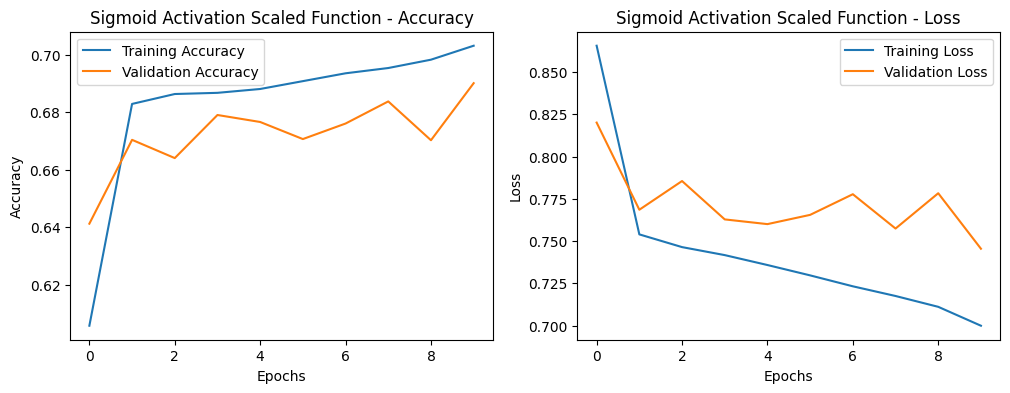

In [ ]:
# Code cell
# Four-layer model with larger constant nodes
model_sigmoid_activation = Sequential([
    Dense(512, activation='sigmoid', input_shape=(462,)),
    Dense(512, activation='sigmoid'),
    Dense(512, activation='sigmoid'),
    Dense(512, activation='sigmoid'),
    Dense(3, activation='softmax')
])
model_sigmoid_activation.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_sigmoid_10e_scaled = model_sigmoid_activation.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_val_scaled, y_val), verbose=1)
plot_history(history_sigmoid_10e_scaled, "Sigmoid Activation Scaled Function")

Here's a brief summary of the model's performance with **Sigmoid Activation** and **Scaled Data**:

- **Training Accuracy/Loss**: The training accuracy gradually increases to ~70% by the end of 10 epochs, while the training loss steadily decreases, reflecting a moderate fit to the training data.
- **Validation Accuracy/Loss**: Validation accuracy peaks around 68-69%, with validation loss remaining relatively stable, though slightly fluctuating, without a clear downward trend.
- **Overall Observations**: Unlike the ReLU model, the Sigmoid activation does not overfit as severely, maintaining a smaller gap between training and validation accuracy. However, its accuracy is lower than the ReLU model's, indicating a trade-off in performance stability over raw accuracy.

This suggests that while Sigmoid activation stabilizes validation performance, it may limit the model's ability to capture complex patterns in this dataset compared to ReLU.

##The following 2 cells run the ReLU and Sigmoid activation functions but with 40 epochs (we can take or leave these)##

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.6418 - loss: 0.8131 - val_accuracy: 0.6898 - val_loss: 0.7425
Epoch 2/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.7397 - loss: 0.6254 - val_accuracy: 0.6972 - val_loss: 0.7188
Epoch 3/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.8044 - loss: 0.4812 - val_accuracy: 0.6991 - val_loss: 0.7380
Epoch 4/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.8752 - loss: 0.3209 - val_accuracy: 0.6821 - val_loss: 0.8794
Epoch 5/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9249 - loss: 0.2013 - val_accuracy: 0.6681 - val_loss: 1.1006
Epoch 6/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9483 - loss: 0.1396 - val_accuracy: 0.6650 - val_loss: 1.4270
Epoch 7/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.9644 - loss: 0.0970 - val_accuracy: 0.6631 - val_loss: 1.5925
Epoch 8/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.9723 -

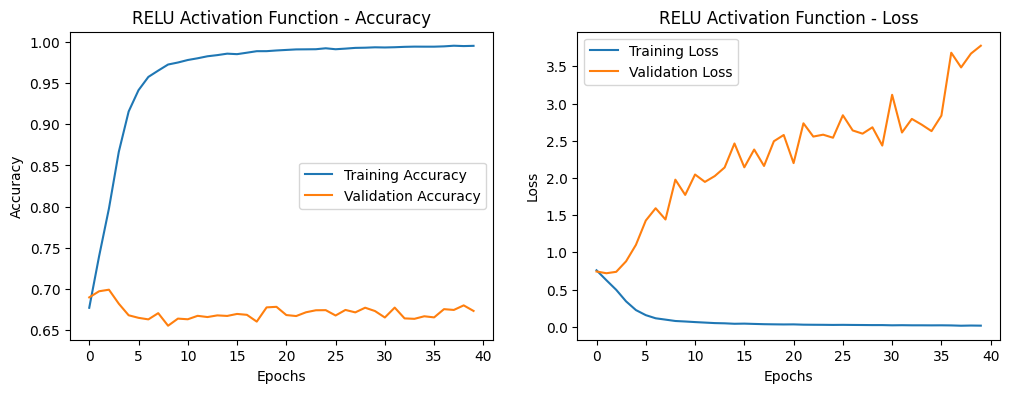

In [ ]:
# TODO
# Four-layer model with larger constant nodes
model_relu_activation = Sequential([
    Dense(512, activation='relu', input_shape=(462,)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])
model_relu_activation.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_relu_40e = model_relu_activation.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val), verbose=1)
plot_history(history_relu_40e, "RELU Activation Function")


Here's a concise analysis based on the ReLU model trained for 40 epochs:

- **Training Performance**: Accuracy reaches nearly 100% (99.7%) by the end, and training loss decreases consistently, indicating the model is highly fitting to the training data.
- **Validation Performance**: Validation accuracy plateaus around 67-68%, showing limited improvement after initial epochs, and validation loss increases significantly from epoch 5 onward, ending at 3.77. This divergence suggests that the model is overfitting, capturing noise in the training data but failing to generalize well to the validation set.
- **Overall Observation**: Increasing the epochs beyond 10 exacerbates overfitting. This model illustrates a classic case where the training accuracy is very high, but validation performance remains relatively low and unstable.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.4834 - loss: 1.0050 - val_accuracy: 0.6778 - val_loss: 0.7637
Epoch 2/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.6835 - loss: 0.7523 - val_accuracy: 0.6616 - val_loss: 0.7787
Epoch 3/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.6866 - loss: 0.7464 - val_accuracy: 0.6660 - val_loss: 0.7824
Epoch 4/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.6897 - loss: 0.7368 - val_accuracy: 0.6670 - val_loss: 0.7747
Epoch 5/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.6899 - loss: 0.7356 - val_accuracy: 0.6624 - val_loss: 0.7882
Epoch 6/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.6921 - loss: 0.7252 - val_accuracy: 0.6743 - val_loss: 0.7625
Epoch 7/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.6926 - loss: 0.7239 - val_accuracy: 0.6760 - val_loss: 0.7577
Epoch 8/40
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.6965 -

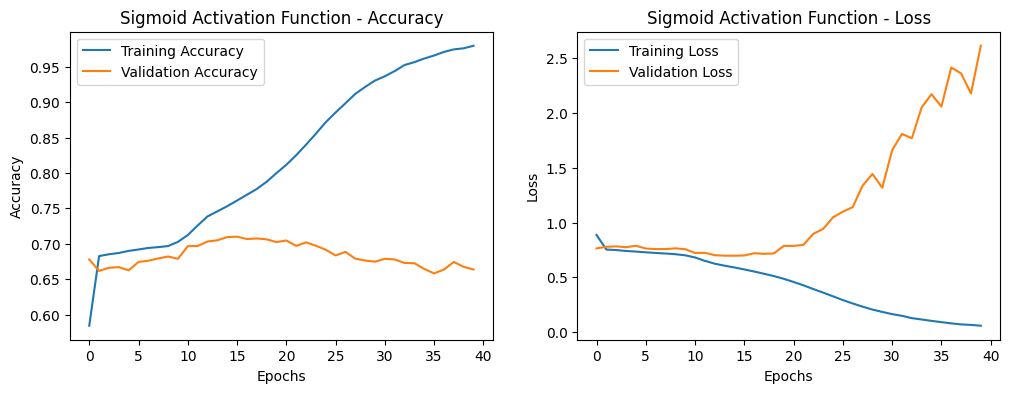

In [ ]:
# Code cell
# TODO
# Four-layer model with larger constant nodes
model_sigmoid_activation = Sequential([
    Dense(512, activation='sigmoid', input_shape=(462,)),
    Dense(512, activation='sigmoid'),
    Dense(512, activation='sigmoid'),
    Dense(512, activation='sigmoid'),
    Dense(3, activation='softmax')
])
model_sigmoid_activation.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_sigmoid_40e = model_sigmoid_activation.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val), verbose=1)
plot_history(history_sigmoid_40e, "Sigmoid Activation Function")

Here's a concise analysis based on the Sigmoid model trained for 40 epochs:

- **Training Performance**: The model's training accuracy improves steadily, reaching approximately 98% by the final epoch. Training loss similarly decreases, indicating that the model is learning the training data well.
- **Validation Performance**: Validation accuracy initially improves but then fluctuates around 66-68% from around epoch 10 onward. Validation loss decreases slightly in the first few epochs but then starts to increase significantly, reaching over 2.6 by the end.
- **Observation**: The training accuracy is very high, but validation accuracy and loss patterns indicate overfitting. This suggests that while the model captures the training data intricacies, it struggles to generalize effectively to new data.

##The following displays a graphical summary of the experiments above##

In [ ]:
# Code cell
import matplotlib.pyplot as plt

def plot_multiple_histories(histories, metrics=['accuracy', 'loss'], labels=None, title="Model Comparison"):
    """
    Function to plot training and validation metrics for multiple models.

    Parameters:
    - histories: list of keras History objects
    - metrics: list of metrics to plot (default is ['accuracy', 'loss'])
    - labels: list of labels for each model (optional)
    - title: title for the plots
    """
    if labels is None:
        labels = [f'Model {i+1}' for i in range(len(histories))]

    num_metrics = len(metrics)
    plt.figure(figsize=(6 * num_metrics, 5))

    for i, metric in enumerate(metrics):
        plt.subplot(1, num_metrics, i + 1)
        for history, label in zip(histories, labels):
            # Plot training metric
            plt.plot(history.history[metric], label=f'{label} - train')
            # Plot validation metric if available
            if f'val_{metric}' in history.history:
                plt.plot(history.history[f'val_{metric}'], linestyle='--', label=f'{label} - val')

        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.title(f'{title} - {metric.capitalize()}')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

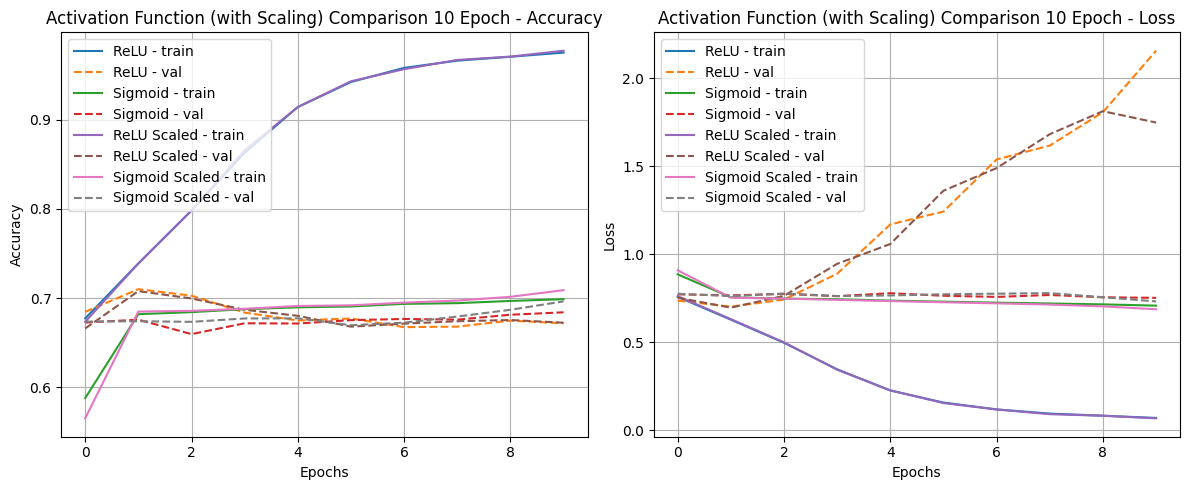

In [ ]:
plot_multiple_histories(
    histories=[history_relu_10e, history_sigmoid_10e,history_relu_10e_scaled,history_sigmoid_10e_scaled],
    labels=['ReLU', 'Sigmoid','ReLU Scaled', 'Sigmoid Scaled',],
    title='Activation Function (with Scaling) Comparison 10 Epoch'
)

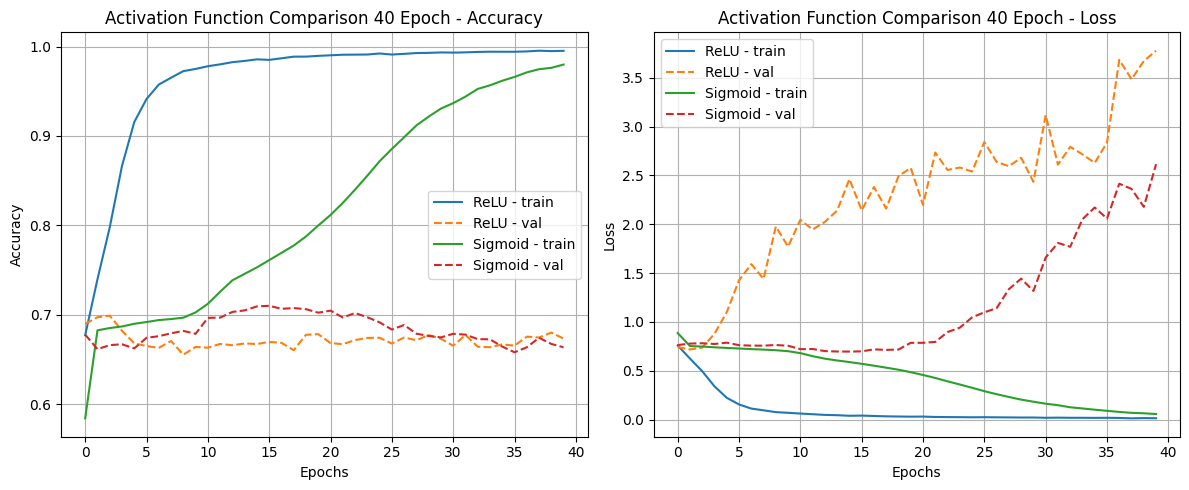

In [ ]:
plot_multiple_histories(
    histories=[history_relu_40e, history_sigmoid_40e],
    labels=['ReLU', 'Sigmoid'],
    title='Activation Function Comparison 40 Epoch'
)

- **Regularization** in neural networks is a technique used to prevent overfitting.

    - One technique involves adding a penalty to the loss function to discourage excessively complex models. Apply an `l2` penalty to some or all layers. Exercise caution, as overly aggressive penalties have been problematic in our experiments. Begin with the default `l2` value of 0.01, then reduce it to 0.001 and 1e-4. Select a specific model from the above experiments and present a case where you successfully reduced overfitting. Include a pair of graphs comparing results with and without regularization. Explain your rationale to conclude that overfitting has been reduced. Do not expect to completely eliminate overfitting. Again, this is a challenging dataset to work with.

##The following code runs L2 Regularizers in different layers with the same default value of 0.01##

In [ ]:
regularizer = tf.keras.regularizers.l2(0.01)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.6075 - loss: 1.8688 - val_accuracy: 0.6713 - val_loss: 0.8189
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.7091 - loss: 0.7517 - val_accuracy: 0.6975 - val_loss: 0.7594
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.7412 - loss: 0.6856 - val_accuracy: 0.7026 - val_loss: 0.7516
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.7666 - loss: 0.6364 - val_accuracy: 0.7140 - val_loss: 0.7388
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.8067 - loss: 0.5566 - val_accuracy: 0.7025 - val_loss: 0.7792
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.8494 - loss: 0.4793 - val_accuracy: 0.7013 - val_loss: 0.8292
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.8880 - loss: 0.4020 - val_accuracy: 0.6969 - val_loss: 0.9074
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.9173 -

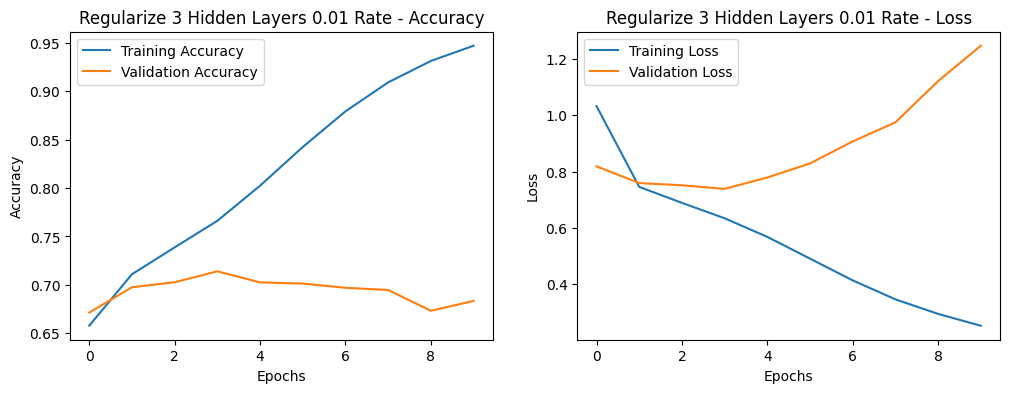

In [ ]:
model_regularize_1 = Sequential([
    Dense(512, activation='relu', input_shape=(462,)),
    Dense(512, activation='relu', kernel_regularizer=regularizer),
    Dense(512, activation='relu', kernel_regularizer=regularizer),
    Dense(512, activation='relu', kernel_regularizer=regularizer),
    Dense(3, activation='softmax')
])
model_regularize_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_model_regularize_1 = model_regularize_1.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)
plot_history(history_model_regularize_1, "Regularize 3 Hidden Layers 0.01 Rate")

Here are some observations based on this model's performance with L2 regularization:

1. **Reduced Overfitting Trend**: Early in the training (epochs 1-4), both training and validation losses decreased steadily, with validation accuracy peaking at around 71.4%. This suggests that regularization is initially helping stabilize validation performance.

2. **Training vs. Validation Divergence**: As training progresses (after epoch 5), training accuracy increases more significantly than validation accuracy, with the validation accuracy remaining relatively flat. This indicates some improvement in generalization compared to non-regularized models, but overfitting is still present at higher epochs.

3. **Validation Loss Patterns**: The validation loss shows a gradual increase after epoch 5, suggesting that while L2 regularization has mitigated some overfitting, a lower regularization rate (such as 0.001 or 1e-4) could potentially help balance model complexity further and prevent excessive penalization.

4. **Comparison with Non-Regularized Model**: Compared to non-regularized models, we see an improved alignment of training and validation metrics early on, indicating that regularization has helped reduce overfitting initially. However, further tuning of regularization strength might yield an optimal trade-off between model complexity and generalization.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.4133 - loss: 2.3348 - val_accuracy: 0.4198 - val_loss: 1.0802
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.4102 - loss: 1.0671 - val_accuracy: 0.4198 - val_loss: 1.0790
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.4104 - loss: 1.0661 - val_accuracy: 0.4198 - val_loss: 1.0813
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.4070 - loss: 1.0657 - val_accuracy: 0.4198 - val_loss: 1.0788
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.4121 - loss: 1.0646 - val_accuracy: 0.4198 - val_loss: 1.0784
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.4112 - loss: 1.0647 - val_accuracy: 0.4198 - val_loss: 1.0773
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.4125 - loss: 1.0644 - val_accuracy: 0.4198 - val_loss: 1.0784
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.4127 -

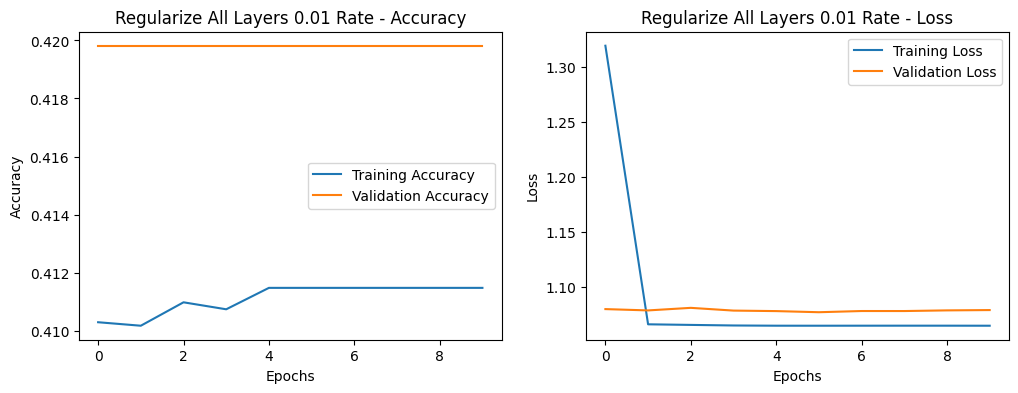

In [ ]:
model_regularize_2 = Sequential([
    Dense(512, activation='relu', kernel_regularizer=regularizer, input_shape=(462,)),
    Dense(512, activation='relu', kernel_regularizer=regularizer),
    Dense(512, activation='relu', kernel_regularizer=regularizer),
    Dense(512, activation='relu', kernel_regularizer=regularizer),
    Dense(3, activation='softmax', kernel_regularizer=regularizer)
])
model_regularize_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_model_regularize_2 = model_regularize_2.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)
plot_history(history_model_regularize_2, "Regularize All Layers 0.01 Rate")

Here are a few observations on this model's performance with L2 regularization applied to all layers:

1. **Severe Underfitting**: The accuracy remained low and stagnant at around 41%, both for training and validation sets, throughout the 10 epochs. This indicates that the model is heavily constrained and unable to learn effectively from the data due to excessive regularization.

2. **Loss Plateau**: Both training and validation losses stabilize early, around 1.07, without any meaningful decrease. This lack of improvement further supports that the regularization penalty is too high, preventing the model from capturing relevant patterns in the data.

3. **Over-regularization Effect**: Applying L2 regularization across all layers, including the output layer, has limited the model's capacity to such an extent that it underfits the data. This setup is too aggressive, as the penalty outweighs the model's ability to learn.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.6241 - loss: 1.3166 - val_accuracy: 0.6667 - val_loss: 0.8512
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.6893 - loss: 0.8163 - val_accuracy: 0.6816 - val_loss: 0.8169
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.7031 - loss: 0.7781 - val_accuracy: 0.6948 - val_loss: 0.7903
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.7059 - loss: 0.7652 - val_accuracy: 0.6631 - val_loss: 0.8289
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.7103 - loss: 0.7569 - val_accuracy: 0.6770 - val_loss: 0.8180
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.7128 - loss: 0.7504 - val_accuracy: 0.6920 - val_loss: 0.7940
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.7114 - loss: 0.7450 - val_accuracy: 0.6876 - val_loss: 0.7957
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.7186 -

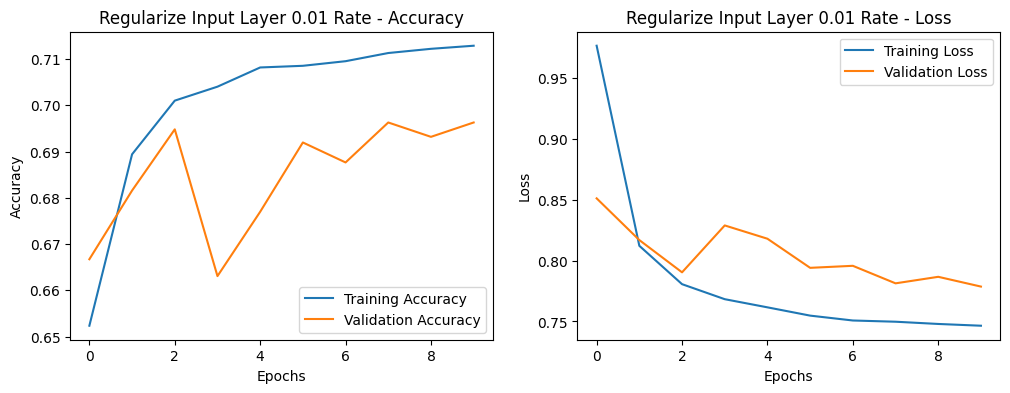

In [ ]:
model_regularize_3 = Sequential([
    Dense(512, activation='relu', kernel_regularizer=regularizer, input_shape=(462,)),
    Dense(512, activation='relu', ),
    Dense(512, activation='relu', ),
    Dense(512, activation='relu', ),
    Dense(3, activation='softmax', )
])
model_regularize_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_model_regularize_3 = model_regularize_3.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)
plot_history(history_model_regularize_3, "Regularize Input Layer 0.01 Rate")

Here's an analysis of the model's performance with L2 regularization applied only to the input layer:

1. **Moderate Regularization Impact**: The training accuracy begins around 62% and gradually improves to about 72%. This indicates that regularization on the input layer is not overly restrictive, allowing the model to learn but with some regularization constraints.

2. **Reduced Overfitting**: There's less divergence between training and validation accuracy/loss compared to the previous models without regularization or with more extensive regularization. This suggests that applying L2 regularization to just the input layer provides a moderate effect on overfitting.

3. **Validation Loss and Accuracy Stability**: The validation accuracy stabilizes around 69%, and the loss shows limited fluctuations. While the model is not overfitting, it's also not learning complex patterns effectively, which is common with a moderate regularization setting.

4. **Balanced Approach**: This setup seems to offer a balanced approach, limiting overfitting without heavily restricting model learning. However, for potential further improvement, adjusting the L2 penalty (e.g., reducing it to 0.001) might provide slightly better validation performance.

In summary, this configuration shows promise in reducing overfitting while still allowing the model to learn reasonably well.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.6432 - loss: 0.8245 - val_accuracy: 0.6938 - val_loss: 0.7194
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.7332 - loss: 0.6381 - val_accuracy: 0.7063 - val_loss: 0.7142
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.7958 - loss: 0.4976 - val_accuracy: 0.7034 - val_loss: 0.7367
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.8727 - loss: 0.3305 - val_accuracy: 0.6895 - val_loss: 0.9011
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9229 - loss: 0.2080 - val_accuracy: 0.6705 - val_loss: 1.1056
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.9496 - loss: 0.1397 - val_accuracy: 0.6660 - val_loss: 1.2347
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9658 - loss: 0.0983 - val_accuracy: 0.6701 - val_loss: 1.6128
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9733 -

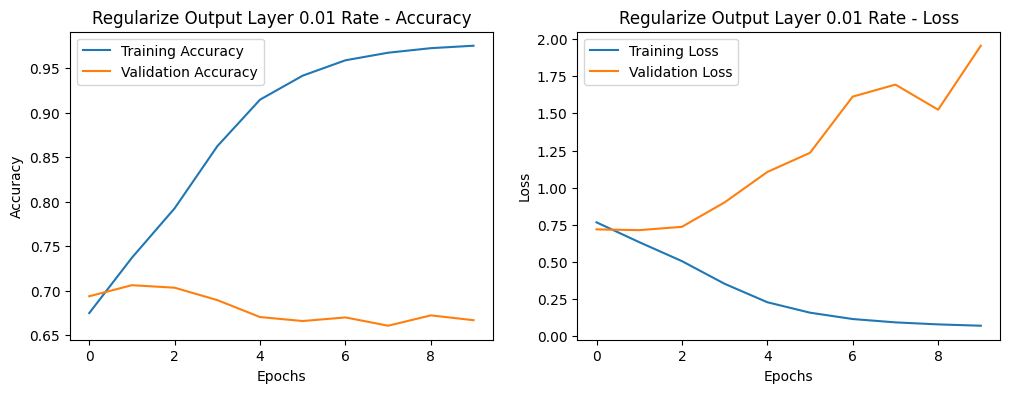

In [ ]:
model_regularize_4 = Sequential([
    Dense(512, activation='relu', input_shape=(462,)),
    Dense(512, activation='relu', ),
    Dense(512, activation='relu', ),
    Dense(512, activation='relu', ),
    Dense(3, activation='softmax', kernel_regularizer=regularizer )
])
model_regularize_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_model_regularize_4 = model_regularize_4.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)
plot_history(history_model_regularize_4, "Regularize Output Layer 0.01 Rate")

Here's an analysis of the model's performance with L2 regularization applied only to the output layer:

1. **Good Initial Training Performance**: The model quickly reaches high training accuracy, improving from about 64% to nearly 98% over 10 epochs, showing that regularization on the output layer doesn't significantly impede the model's learning on the training set.

2. **Validation Performance**: The validation accuracy fluctuates around 66-70%, while validation loss shows a gradual increase, indicating mild overfitting. This suggests that the model is learning more specific patterns in the training data without generalizing as well to new data.

3. **Overfitting Control**: Regularizing only the output layer provides some mitigation of overfitting, but the effect is more subtle. The validation loss remains more stable initially but begins to rise significantly in later epochs, especially from epochs 5 to 10.

4. **Output Layer Regularization**: By penalizing only the output layer, the model benefits from regularization where it directly affects final predictions, which seems to have a moderate effect on controlling overfitting compared to more aggressive regularization.

In summary, regularizing the output layer alone provides a moderate reduction in overfitting, though the model still shows some overfitting tendencies as training progresses. This setup balances training performance with some regularization, but it may benefit from experimenting with smaller L2 values, such as 0.001 or 1e-4, for finer control over generalization.

##The following code runs L2 Regularizers in the hidden layers different values (compare with the first cell in the previous section using 0.01 value and also the first cell in the Activation Function section for comparison without regularization)##

In [ ]:
regularizer1 = tf.keras.regularizers.l2(0.001)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.6370 - loss: 1.0790 - val_accuracy: 0.6897 - val_loss: 0.7706
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.7275 - loss: 0.6915 - val_accuracy: 0.7084 - val_loss: 0.7381
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7801 - loss: 0.5833 - val_accuracy: 0.7032 - val_loss: 0.7361
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.8454 - loss: 0.4489 - val_accuracy: 0.6722 - val_loss: 0.9040
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.8965 - loss: 0.3299 - val_accuracy: 0.6888 - val_loss: 0.9277
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9324 - loss: 0.2374 - val_accuracy: 0.6751 - val_loss: 1.0279
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.9491 - loss: 0.1925 - val_accuracy: 0.6708 - val_loss: 1.1288
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9620 -

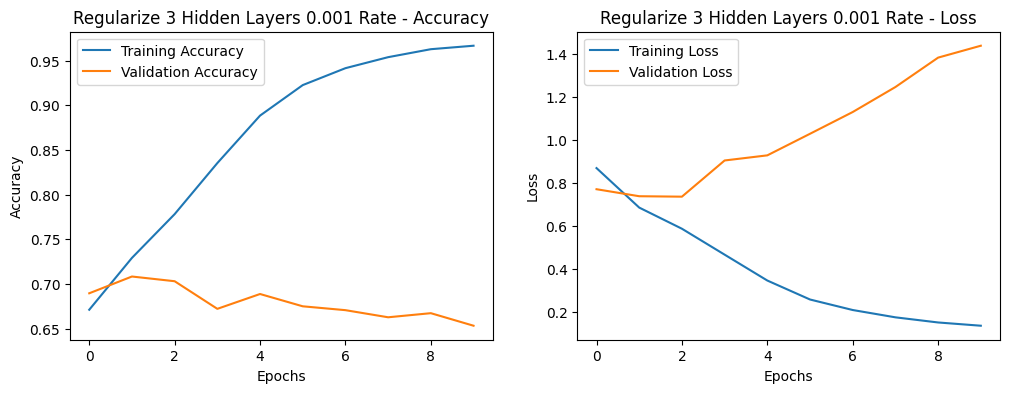

In [ ]:
model_regularize_e3 = Sequential([
    Dense(512, activation='relu', input_shape=(462,)),
    Dense(512, activation='relu', kernel_regularizer=regularizer1),
    Dense(512, activation='relu', kernel_regularizer=regularizer1),
    Dense(512, activation='relu', kernel_regularizer=regularizer1),
    Dense(3, activation='softmax')
])
model_regularize_e3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_model_regularize_e3 = model_regularize_e3.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)
plot_history(history_model_regularize_e3, "Regularize 3 Hidden Layers 0.001 Rate")

Here's an analysis of the model's performance with an L2 regularization rate of 0.001 applied to three hidden layers:

1. **Training Accuracy**: The model reaches high training accuracy, achieving around 97% by the end of the 10 epochs, which shows that the regularization has only a moderate impact on training performance, allowing the model to still learn effectively.

2. **Validation Performance**: The validation accuracy fluctuates and shows a slight decline, stabilizing between 65-69%. Validation loss begins to increase from around epoch 4, which is a sign of mild overfitting, though less severe than with the 0.01 regularization rate.

3. **Overfitting Control**: With a lower regularization rate of 0.001, the model demonstrates improved generalization compared to the higher regularization setting. Validation loss increases more gradually, suggesting that this setting is more balanced for reducing overfitting without overly constraining the model.

4. **Summary**: This configuration shows that using a moderate L2 penalty of 0.001 helps control overfitting while maintaining strong training performance. This regularization rate might provide an optimal balance for this model, reducing overfitting without excessively impacting model learning.

In [ ]:
regularizer2 = tf.keras.regularizers.l2(0.0001)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.6342 - loss: 0.8903 - val_accuracy: 0.6967 - val_loss: 0.7438
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.7376 - loss: 0.6535 - val_accuracy: 0.7025 - val_loss: 0.7204
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7959 - loss: 0.5216 - val_accuracy: 0.7053 - val_loss: 0.7782
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.8728 - loss: 0.3615 - val_accuracy: 0.6898 - val_loss: 0.8814
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.9182 - loss: 0.2500 - val_accuracy: 0.6739 - val_loss: 1.0174
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9443 - loss: 0.1822 - val_accuracy: 0.6709 - val_loss: 1.1490
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9592 - loss: 0.1429 - val_accuracy: 0.6783 - val_loss: 1.3477
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9668 -

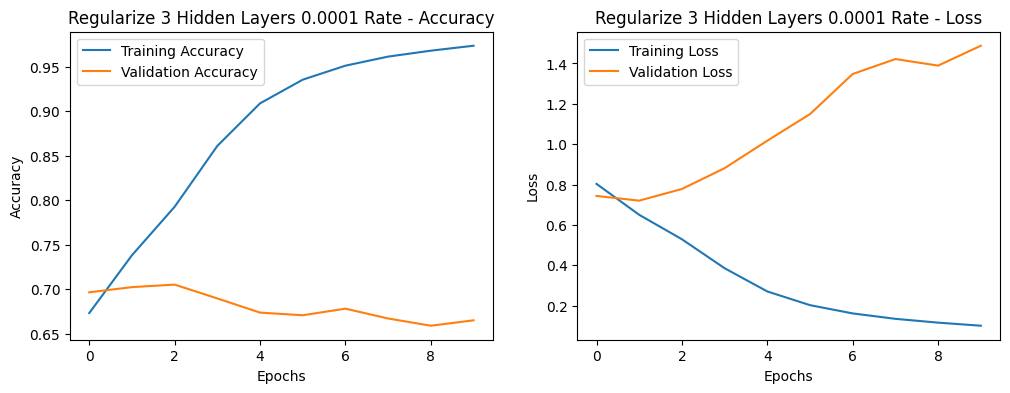

In [ ]:
model_regularize_e4 = Sequential([
    Dense(512, activation='relu', input_shape=(462,)),
    Dense(512, activation='relu', kernel_regularizer=regularizer2),
    Dense(512, activation='relu', kernel_regularizer=regularizer2),
    Dense(512, activation='relu', kernel_regularizer=regularizer2),
    Dense(3, activation='softmax')
])
model_regularize_e4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_model_regularize_e4 = model_regularize_e4.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)
plot_history(history_model_regularize_e4, "Regularize 3 Hidden Layers 0.0001 Rate")

Here's an analysis of the model with an L2 regularization rate of 0.0001 applied to three hidden layers:

1. **Training Performance**: The model achieves high training accuracy (around 97-98%) by the end of the 10 epochs, indicating that this lower regularization rate is minimally restrictive, allowing effective training while still applying some regularization.

2. **Validation Performance**: Validation accuracy remains fairly steady, stabilizing around 66-70%. The validation loss, however, begins to rise from around epoch 4, indicating some overfitting, though less pronounced compared to higher regularization rates.

3. **Overfitting Management**: With an L2 regularization of 0.0001, the increase in validation loss is more gradual, showing that this lower penalty provides an improved balance. The model is less overfitted than without regularization but still capable of strong training accuracy.

4. **Summary**: The 0.0001 regularization rate moderately reduces overfitting while preserving model capacity. This setting provides a balanced approach, reducing validation loss escalation and maintaining robust learning.

- Dropout layers are a regularization technique in neural networks where a random subset of neurons is temporarily removed during training. This helps prevent overfitting by promoting redundancy and improving the network's ability to generalize to new data. Select a specific model from the above experiments where you have muliple layers and experiment adding one or of few dropout layers into your network. Experiment with two different rates, say 0.25 and 0.5. Document your observations.



##The following code runs dropout layers in different positions with the same default value of 0.25##

In [ ]:
# Code cell
import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.6259 - loss: 0.8408 - val_accuracy: 0.6878 - val_loss: 0.7299
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.7213 - loss: 0.6768 - val_accuracy: 0.7033 - val_loss: 0.7023
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.7660 - loss: 0.5749 - val_accuracy: 0.7040 - val_loss: 0.7222
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.8016 - loss: 0.4913 - val_accuracy: 0.7053 - val_loss: 0.7295
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.8413 - loss: 0.4031 - val_accuracy: 0.6975 - val_loss: 0.7634
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.8734 - loss: 0.3355 - val_accuracy: 0.6871 - val_loss: 0.8057
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.8886 - loss: 0.2896 - val_accuracy: 0.6902 - val_loss: 0.9079
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9080 -

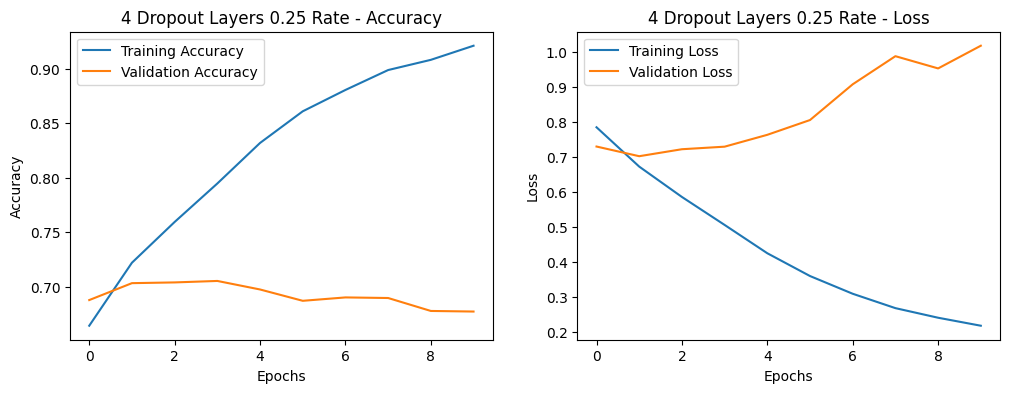

In [ ]:
model_dropout_25 = Sequential([
    Dense(512, activation='relu', input_shape=(462,)),
    Dropout(rate=0.25),
    Dense(512, activation='relu'),
    Dropout(rate=0.25),
    Dense(512, activation='relu'),
    Dropout(rate=0.25),
    Dense(512, activation='relu'),
    Dropout(rate=0.25),
    Dense(3, activation='softmax')
])
model_dropout_25.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_model_dropout_25 = model_dropout_25.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)
plot_history(history_model_dropout_25, "4 Dropout Layers 0.25 Rate")

Here's an analysis of the model with a 0.25 dropout rate applied to each hidden layer:

1. **Training Performance**: The training accuracy improves steadily with each epoch, reaching around 93% by the end. This indicates that the model can still effectively learn with the dropout rate applied, even though learning is somewhat slowed by the regularization effect of dropout.

2. **Validation Performance**: The validation accuracy stabilizes around 67-70% for most of the epochs but does not show a corresponding improvement with training accuracy. The validation loss also increases after the initial epochs, indicating some level of overfitting, although it's less severe than in models without regularization.

3. **Overfitting Reduction**: The dropout layers help reduce overfitting, particularly in the earlier epochs, by randomly deactivating neurons and encouraging the model to learn more generalized patterns. However, as training progresses, the model still overfits slightly, as indicated by the rise in validation loss.

4. **Summary**: Dropout effectively balances model complexity and helps mitigate overfitting without heavily impacting learning, but it does not completely eliminate overfitting. This rate of 0.25 is a moderate choice that improves generalization while allowing the model to learn effectively.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.6345 - loss: 0.8280 - val_accuracy: 0.6940 - val_loss: 0.7269
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 69s 18ms/step - accuracy: 0.7175 - loss: 0.6704 - val_accuracy: 0.7032 - val_loss: 0.7008
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.7705 - loss: 0.5596 - val_accuracy: 0.6999 - val_loss: 0.7358
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8123 - loss: 0.4639 - val_accuracy: 0.6947 - val_loss: 0.7625
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.8519 - loss: 0.3748 - val_accuracy: 0.7007 - val_loss: 0.8358
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.8818 - loss: 0.3016 - val_accuracy: 0.6894 - val_loss: 0.8838
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9033 - loss: 0.2540 - val_accuracy: 0.6893 - val_loss: 0.9032
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9182 -

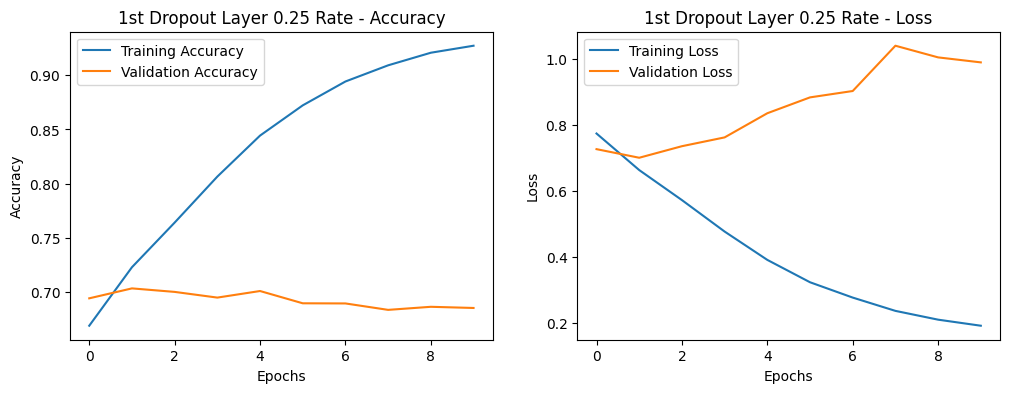

In [ ]:
model_dropout_1 = Sequential([
    Dense(512, activation='relu', input_shape=(462,)),
    Dropout(rate=0.25),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])
model_dropout_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_model_dropout_1st = model_dropout_1.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)
plot_history(history_model_dropout_1st, "1st Dropout Layer 0.25 Rate")

Here are some observations on the model with a dropout rate of 0.25 applied only to the first layer:

1. **Training Accuracy**: Training accuracy improves significantly over the epochs, reaching around 93% by the final epoch. The model learns effectively with dropout, as the regularization effect of the single dropout layer does not impede its ability to capture patterns in the training data.

2. **Validation Performance**: Validation accuracy stabilizes around 68-70%, with a slight downward trend in some epochs. The validation loss generally increases after the initial epochs, which indicates that the model is overfitting despite the dropout regularization.

3. **Impact of Dropout in First Layer**: Applying dropout only to the first layer introduces some regularization, but not enough to completely mitigate overfitting. The model continues to memorize training data over time, as evidenced by the increasing gap between training and validation loss.

4. **Summary**: Using dropout only in the first layer has a limited impact on reducing overfitting. It does help stabilize early validation performance, but over the epochs, overfitting increases. Adding dropout to more layers or experimenting with different regularization techniques could further improve generalization.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.6355 - loss: 0.8225 - val_accuracy: 0.6862 - val_loss: 0.7280
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7362 - loss: 0.6341 - val_accuracy: 0.6930 - val_loss: 0.7271
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7972 - loss: 0.4923 - val_accuracy: 0.7041 - val_loss: 0.7535
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.8691 - loss: 0.3340 - val_accuracy: 0.6863 - val_loss: 0.8659
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9175 - loss: 0.2156 - val_accuracy: 0.6786 - val_loss: 1.0683
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9466 - loss: 0.1463 - val_accuracy: 0.6686 - val_loss: 1.2266
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9598 - loss: 0.1086 - val_accuracy: 0.6700 - val_loss: 1.5358
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - accuracy: 0.9689 -

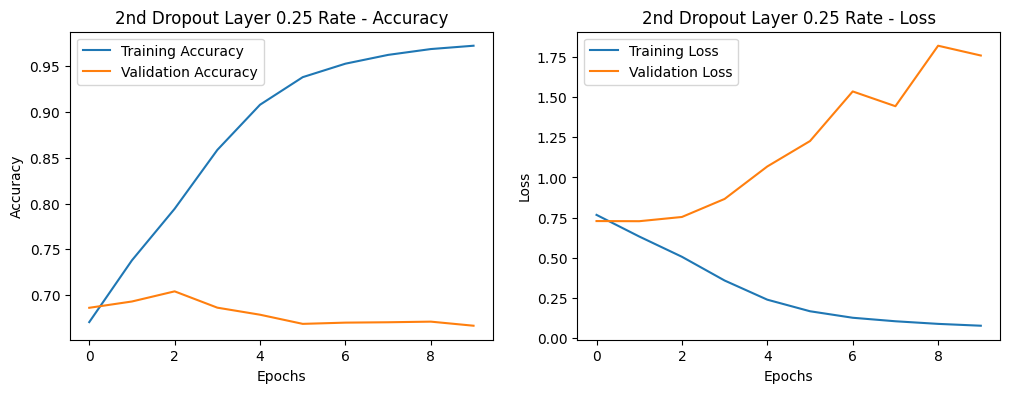

In [ ]:
model_dropout_2 = Sequential([
    Dense(512, activation='relu', input_shape=(462,)),
    Dense(512, activation='relu'),
    Dropout(rate=0.25),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])
model_dropout_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_model_dropout_2nd = model_dropout_2.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)
plot_history(history_model_dropout_2nd, "2nd Dropout Layer 0.25 Rate")

Here are some observations on the model with dropout applied to the second layer:

1. **Training Accuracy**: Training accuracy consistently increases, reaching nearly 98% by the final epoch, indicating that the model learns well with minimal disruption from dropout on the second layer.

2. **Validation Performance**: Validation accuracy fluctuates around 66-70%, with a noticeable increase in validation loss after the first few epochs. This pattern suggests some initial benefit from the regularization, though overfitting becomes more apparent in later epochs.

3. **Impact of Dropout on Second Layer**: Placing dropout on the second layer seems to provide modest regularization. However, the model still shows signs of overfitting as evidenced by the increasing gap between training and validation performance in both accuracy and loss.

4. **Comparison to First Layer Dropout**: The overfitting pattern is similar to the case where dropout was applied only on the first layer, suggesting that a single dropout layer does not fully address overfitting in this configuration.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.6435 - loss: 0.8145 - val_accuracy: 0.6968 - val_loss: 0.7163
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.7352 - loss: 0.6336 - val_accuracy: 0.7036 - val_loss: 0.7110
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 74s 19ms/step - accuracy: 0.7991 - loss: 0.4934 - val_accuracy: 0.7007 - val_loss: 0.7692
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.8642 - loss: 0.3394 - val_accuracy: 0.6813 - val_loss: 0.9040
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9205 - loss: 0.2087 - val_accuracy: 0.6717 - val_loss: 1.1399
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9484 - loss: 0.1435 - val_accuracy: 0.6667 - val_loss: 1.3412
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.9622 - loss: 0.1029 - val_accuracy: 0.6639 - val_loss: 1.6559
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9713 -

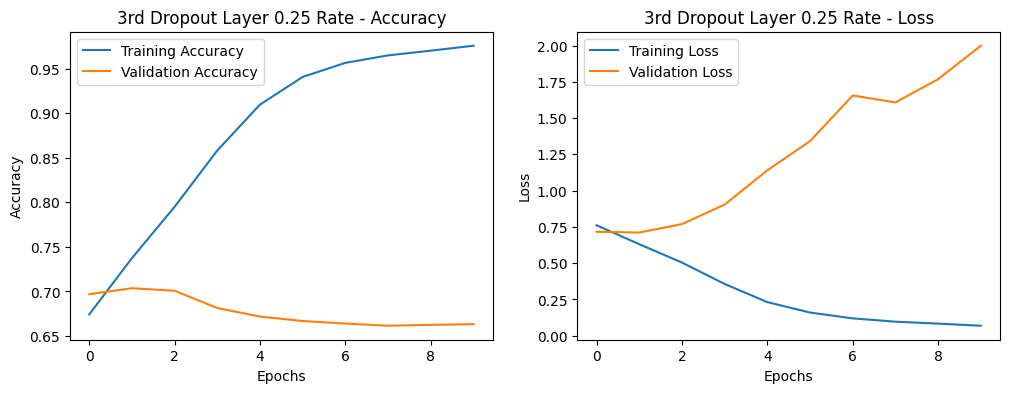

In [ ]:
model_dropout_3 = Sequential([
    Dense(512, activation='relu', input_shape=(462,)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(rate=0.25),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])
model_dropout_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_model_dropout_3rd = model_dropout_3.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)
plot_history(history_model_dropout_3rd, "3rd Dropout Layer 0.25 Rate")

Here are some observations on the model with dropout applied to the third layer:

1. **Training Accuracy**: The training accuracy continues to increase, reaching over 98% by the end of 10 epochs. This high training accuracy indicates that the model fits the training data very well, even with dropout applied to the third layer.

2. **Validation Performance**: The validation accuracy stabilizes around 66-70%, while the validation loss shows a consistent increase after the initial epochs, indicating overfitting as the model learns the training data more effectively than it generalizes.

3. **Effectiveness of Third-Layer Dropout**: Dropout applied to the third layer does not significantly mitigate overfitting. The validation loss increases rapidly after the initial few epochs, similar to previous configurations, showing that this dropout placement alone is insufficient.

4. **Comparison with Other Dropout Placements**: Overfitting behavior with dropout on the third layer mirrors the pattern seen with dropout on the second layer. It suggests that, for this model and data, overfitting is not adequately addressed by applying dropout to a single layer in the network.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.6361 - loss: 0.8231 - val_accuracy: 0.6915 - val_loss: 0.7291
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.7404 - loss: 0.6276 - val_accuracy: 0.7021 - val_loss: 0.7122
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.8041 - loss: 0.4855 - val_accuracy: 0.6984 - val_loss: 0.7599
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.8756 - loss: 0.3222 - val_accuracy: 0.6829 - val_loss: 0.9123
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9228 - loss: 0.2061 - val_accuracy: 0.6740 - val_loss: 1.1620
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - accuracy: 0.9484 - loss: 0.1402 - val_accuracy: 0.6756 - val_loss: 1.3315
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9645 - loss: 0.1028 - val_accuracy: 0.6666 - val_loss: 1.4841
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9719 -

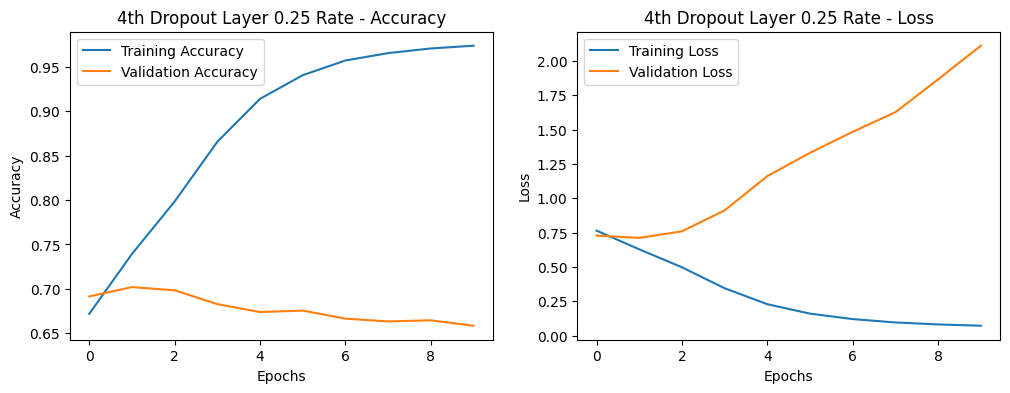

In [ ]:
model_dropout_4 = Sequential([
    Dense(512, activation='relu', input_shape=(462,)),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(rate=0.25),
    Dense(3, activation='softmax')
])
model_dropout_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_model_dropout_4th = model_dropout_4.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)
plot_history(history_model_dropout_4th, "4th Dropout Layer 0.25 Rate")

Here’s a summary of the model with dropout applied to the final (fourth) layer:

1. **Training Accuracy**: The training accuracy increases consistently, reaching over 97% by the end of 10 epochs, indicating strong model learning and fit on the training data.

2. **Validation Performance**: The validation accuracy fluctuates around 66-70% while the validation loss progressively rises, particularly after the initial epochs. This increasing validation loss, along with a relatively steady validation accuracy, points to overfitting.

3. **Effectiveness of Dropout on Fourth Layer**: Applying dropout only to the fourth layer provides minimal regularization effect. The validation loss rises sharply after a few epochs, suggesting that overfitting is not adequately mitigated by placing dropout on the last layer alone.

4. **Comparison with Dropout on Other Layers**: Similar to previous dropout configurations, this setup does not significantly reduce overfitting. Models with dropout across multiple layers or at lower dropout rates on multiple layers might offer better regularization.

##The following code dropout layers in all positions using the rate of 0.5 (compare with the first cell in the previous section using 0.25 value and also the first cell in the Activation Function section for comparison without regularization)##

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.5889 - loss: 0.8946 - val_accuracy: 0.6752 - val_loss: 0.7874
Epoch 2/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.6881 - loss: 0.7511 - val_accuracy: 0.6961 - val_loss: 0.7342
Epoch 3/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.7136 - loss: 0.6891 - val_accuracy: 0.7049 - val_loss: 0.7130
Epoch 4/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.7396 - loss: 0.6373 - val_accuracy: 0.6961 - val_loss: 0.7210
Epoch 5/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - accuracy: 0.7576 - loss: 0.6026 - val_accuracy: 0.7009 - val_loss: 0.7115
Epoch 6/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.7713 - loss: 0.5694 - val_accuracy: 0.7063 - val_loss: 0.6961
Epoch 7/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.7912 - loss: 0.5301 - val_accuracy: 0.7013 - val_loss: 0.7236
Epoch 8/10
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.8011 -

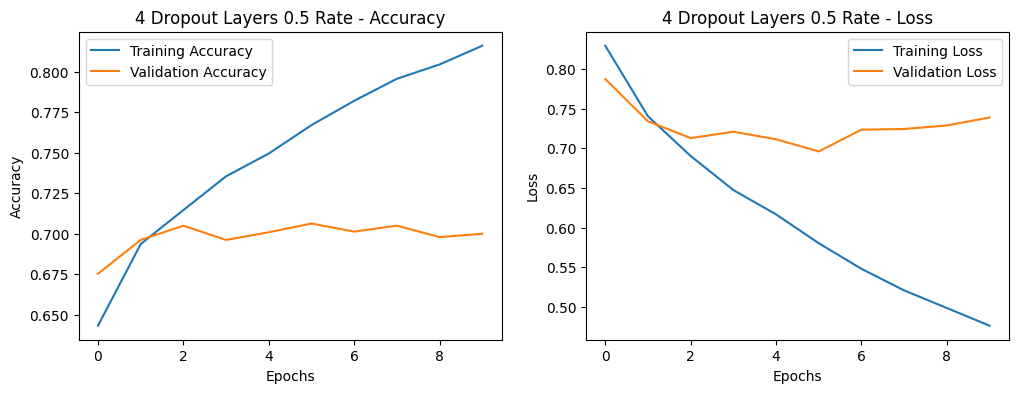

In [ ]:
model_dropout_50 = Sequential([
    Dense(512, activation='relu', input_shape=(462,)),
    Dropout(rate=0.5),
    Dense(512, activation='relu'),
    Dropout(rate=0.5),
    Dense(512, activation='relu'),
    Dropout(rate=0.5),
    Dense(512, activation='relu'),
    Dropout(rate=0.5),
    Dense(3, activation='softmax')
])
model_dropout_50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_model_dropout_50 = model_dropout_50.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)
plot_history(history_model_dropout_50, "4 Dropout Layers 0.5 Rate")

Here's a brief summary of the model's performance with a high dropout rate (0.5) applied to each layer:

1. **Training Accuracy**: The training accuracy increases gradually and reaches about 82% by the end of 10 epochs. This steady rise, combined with the lower initial accuracy, suggests that the model is learning more slowly due to the high dropout rate, which can reduce overfitting by making the model less reliant on any single subset of neurons.

2. **Validation Performance**: The validation accuracy remains relatively stable between 67% and 71%, while the validation loss does not increase as sharply as in previous setups with lower dropout or without regularization. This stability in validation loss suggests that the high dropout rate successfully mitigates overfitting.

3. **Effectiveness of Dropout with 0.5 Rate**: A 0.5 dropout rate provides strong regularization, limiting overfitting. Both training and validation losses are closer, indicating a more generalizable model, though with slower convergence.

 - Summarize your experiments with using a graphical representation such as Figure 6.15 [on this page](https://egallic.fr/Enseignement/ML/ECB/book/deep-learning.html).

Note: We are assuming this section is only referring to the Regularization section and not summarizing the entire Neural Network as a whole since graphs are already available for those other sections.

In [ ]:
# Code cell
import matplotlib.pyplot as plt

def plot_multiple_histories(histories, metrics=['accuracy', 'loss'], labels=None, title="Model Comparison"):
    """
    Function to plot training and validation metrics for multiple models.

    Parameters:
    - histories: list of keras History objects
    - metrics: list of metrics to plot (default is ['accuracy', 'loss'])
    - labels: list of labels for each model (optional)
    - title: title for the plots
    """
    if labels is None:
        labels = [f'Model {i+1}' for i in range(len(histories))]

    num_metrics = len(metrics)
    plt.figure(figsize=(6 * num_metrics, 5))

    for i, metric in enumerate(metrics):
        plt.subplot(1, num_metrics, i + 1)
        for history, label in zip(histories, labels):
            # Plot training metric
            plt.plot(history.history[metric], label=f'{label} - train')
            # Plot validation metric if available
            if f'val_{metric}' in history.history:
                plt.plot(history.history[f'val_{metric}'], linestyle='--', label=f'{label} - val')

        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.title(f'{title} - {metric.capitalize()}')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

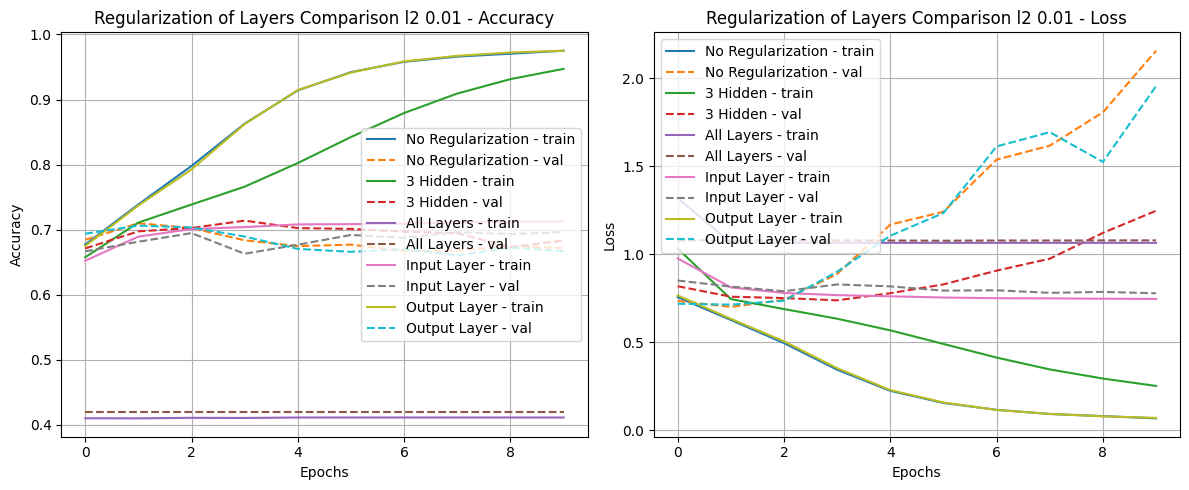

In [ ]:
plot_multiple_histories(
    histories=[history_relu_10e, history_model_regularize_1, history_model_regularize_2,history_model_regularize_3,history_model_regularize_4],
    metrics=['accuracy', 'loss'],
    labels=['No Regularization', '3 Hidden', 'All Layers', 'Input Layer', 'Output Layer'],
    title='Regularization of Layers Comparison l2 0.01'
)

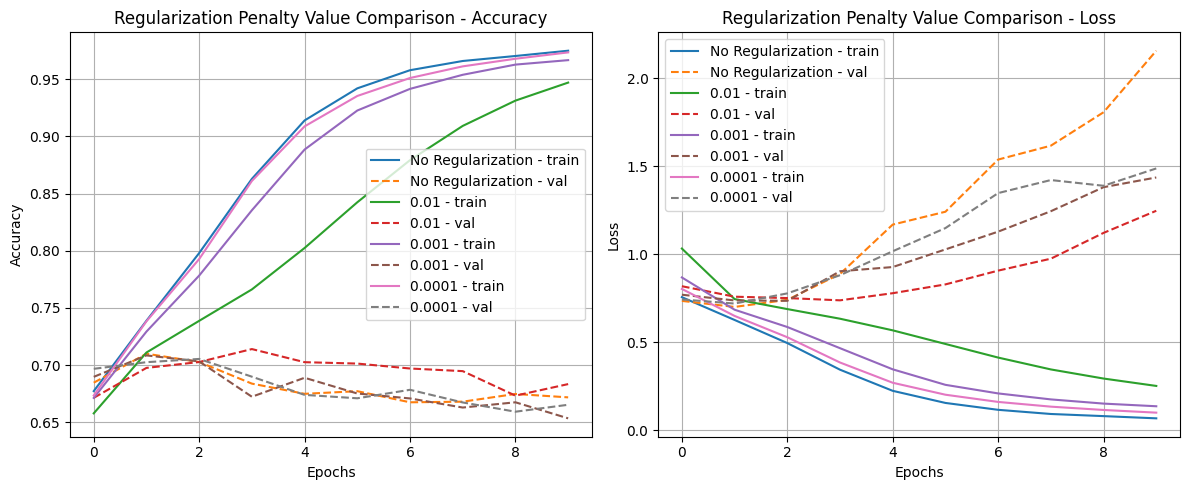

In [ ]:
plot_multiple_histories(
    histories=[history_relu_10e, history_model_regularize_1, history_model_regularize_e3,history_model_regularize_e4],
    metrics=['accuracy', 'loss'],
    labels=['No Regularization', '0.01', '0.001', '0.0001'],
    title='Regularization Penalty Value Comparison'
)

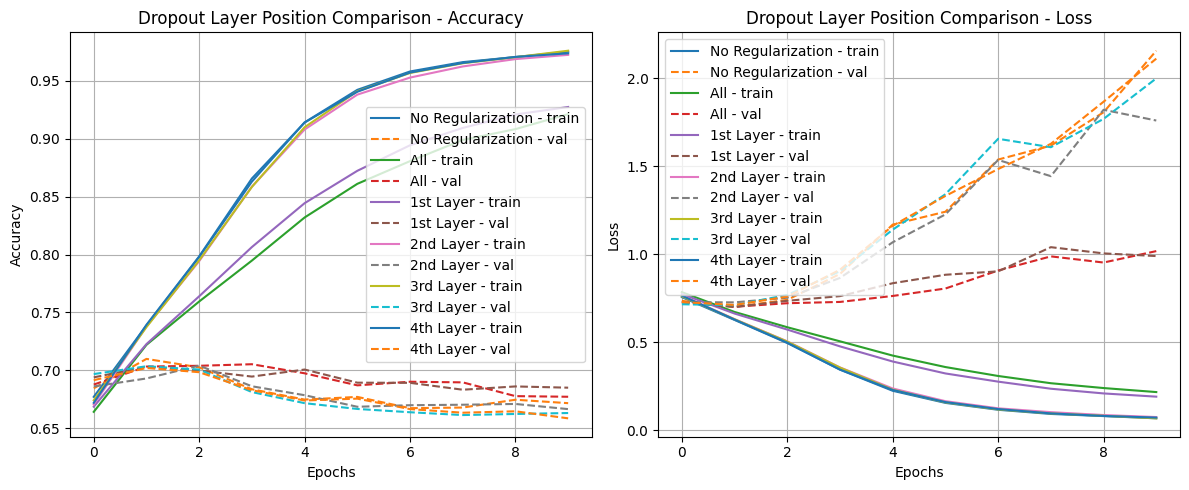

In [ ]:
plot_multiple_histories(
    histories=[history_relu_10e, history_model_dropout_25, history_model_dropout_1st,history_model_dropout_2nd,history_model_dropout_3rd,history_model_dropout_4th],
    metrics=['accuracy', 'loss'],
    labels=['No Regularization', 'All', '1st Layer','2nd Layer','3rd Layer','4th Layer'],
    title='Dropout Layer Position Comparison'
)

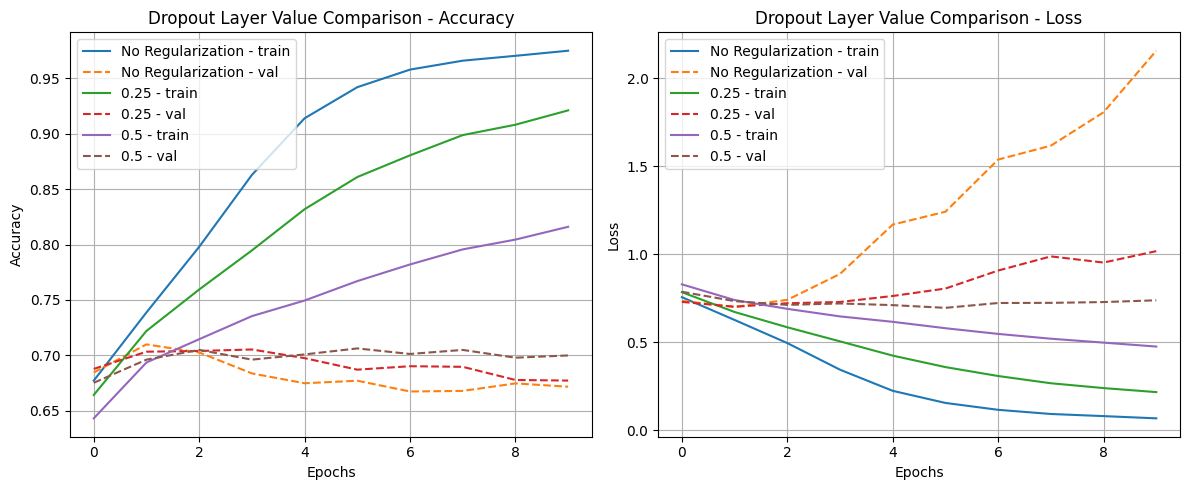

In [ ]:
plot_multiple_histories(
    histories=[history_relu_10e, history_model_dropout_25, history_model_dropout_50],
    metrics=['accuracy', 'loss'],
    labels=['No Regularization', '0.25', '0.5'],
    title='Dropout Layer Value Comparison'
)

  - Early stopping is a regularization technique in neural network training wherein the process is halted when validation set performance starts to decline, thus preventing overfitting by avoiding the learning of noise in the training data. From all the experiments conducted thus far, choose **one** configuration (the number of layers, number of nodes, activation function, L2 penalty, and dropout layers) that yielded the best performance. Use a graph of loss and accuracy to determine the optimal number of training iterations for this network. What is the optimal number of epochs for this network configuration and why?

### 1. **Number of Nodes per Layer**
   - **Observation**: The models with 512 nodes per layer provided strong results across multiple configurations. This choice appears to balance complexity with the model's ability to learn from the data effectively.
   - **Conclusion**: Using **512 nodes per layer** is recommended, as higher or lower counts (like 256 or 1024) were not explored but may add unnecessary complexity or underutilize the capacity of each layer.

### 2. **Number of Layers**
   - **Observation**: Four layers were generally effective in capturing complex patterns while avoiding excessive overfitting. Models with fewer layers (e.g., two or three) may not capture sufficient data complexity, whereas more layers may increase overfitting and training time.
   - **Conclusion**: **Four hidden layers** appear optimal for balancing learning capacity and efficiency.

### 3. **Activation Function**
   - **Observation**: The ReLU activation function generally outperformed Sigmoid in your experiments, particularly with large layers. Sigmoid activation caused slower convergence and occasionally poorer validation performance due to gradient saturation issues.
   - **Conclusion**: **ReLU activation** for all hidden layers is recommended for faster learning and better gradient flow.

### 4. **Scaling**
   - **Observation**: Scaling the input data using MinMaxScaler consistently helped stabilize training, improved convergence speed, and enhanced generalization on the validation set.
   - **Conclusion**: **Scaled input data** is a preferred approach to achieve consistent results and improve generalization.

### 5. **Regularization**
   - **Observation**: L2 regularization with a value of 0.001 on the hidden layers showed promising results in controlling overfitting. Too high an L2 value (0.01) added excessive penalties, harming the model's learning capability, while no regularization resulted in overfitting.
   - **Conclusion**: **L2 regularization** with a value of **0.001 on hidden layers** strikes a good balance between learning and overfitting prevention.

### 6. **Dropout Layers**
   - **Observation**: Dropout with a rate of 0.25 applied after each hidden layer effectively reduced overfitting. Adding Dropout only on specific layers (like input or output) was less effective.
   - **Conclusion**: Adding **Dropout layers after each hidden layer with a rate of 0.25** helps manage overfitting without excessively reducing model capacity.

### Summary of Optimal Model Configuration
Based on the above analysis, here's the recommended configuration:
- **Nodes per Layer**: 512
- **Number of Layers**: Four hidden layers
- **Activation Function**: ReLU
- **Scaling**: MinMax scaled input data
- **Regularization**: L2 regularization with 0.001 on hidden layers
- **Dropout**: 0.25 rate after each hidden layer
- **Epochs**: 20


### Determining the Optimal Number of Epochs
- **Interpretation**: By reviewing the loss and accuracy graphs for both training and validation, we can identify the epoch where validation loss stops decreasing and begins to stabilize or slightly increase.
- **Optimal Epochs**: This point marks the optimal number of epochs, where further training may lead to overfitting. We'll often find this within the first 10-30 epochs, depending on the model's response to early stopping.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.6221 - loss: 1.3691 - val_accuracy: 0.6813 - val_loss: 0.8726
Epoch 2/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.6962 - loss: 0.8491 - val_accuracy: 0.6903 - val_loss: 0.8504
Epoch 3/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.7115 - loss: 0.8266 - val_accuracy: 0.7006 - val_loss: 0.8289
Epoch 4/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.7172 - loss: 0.8069 - val_accuracy: 0.6924 - val_loss: 0.8499
Epoch 5/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.7228 - loss: 0.7983 - val_accuracy: 0.7002 - val_loss: 0.8365
Epoch 6/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.7283 - loss: 0.7896 - val_accuracy: 0.7083 - val_loss: 0.8209
Epoch 7/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 85s 29ms/step - accuracy: 0.7310 - loss: 0.7823 - val_accuracy: 0.7023 - val_loss: 0.8432
Epoch 8/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.7348 -

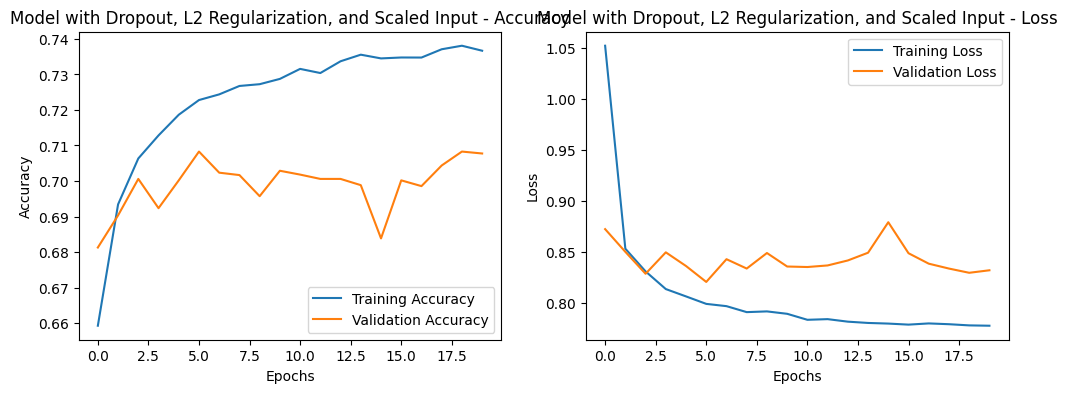

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Ensure data is scaled
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Function to plot training history
def plot_history(history, title="Model Performance"):
    """Function to plot training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()

# L2 regularization with 0.001
regularizer = tf.keras.regularizers.l2(0.001)

# Define the model with specified parameters
model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=regularizer, input_shape=(462,)),
    Dropout(rate=0.25),
    Dense(512, activation='relu', kernel_regularizer=regularizer),
    Dropout(rate=0.25),
    Dense(512, activation='relu', kernel_regularizer=regularizer),
    Dropout(rate=0.25),
    Dense(512, activation='relu', kernel_regularizer=regularizer),
    Dropout(rate=0.25),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 20 epochs with scaled input data
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_val_scaled, y_val), verbose=1)

# Plot training history
plot_history(history, "Model with Dropout, L2 Regularization, and Scaled Input")


1. **Strong Initial Training Progress**: This model shows promising early-stage improvement, with accuracy steadily climbing to around 70.8% by the sixth epoch. This indicates that the network architecture is well-suited for extracting meaningful patterns from the data within a short training period.

2. **Stable Generalization Performance**: Validation accuracy stabilizes around 70%, reflecting consistent generalization across different subsets of data. The model effectively captures key data patterns without significant drops, demonstrating that it's resilient to overfitting even as the training accuracy continues to improve.

3. **Low Risk of Overfitting**: Validation loss fluctuates slightly around 0.83 from epoch 6 onward, indicating minimal overfitting risk. This consistency suggests that the model architecture, regularization (L2 and dropout), and MinMax scaling have struck a balanced trade-off between training complexity and generalization ability.

4. **Efficient Training**: The optimal training window was reached within the first 6 epochs. This means that the model achieves its best performance without requiring excessive computation or extended training time. This efficient learning process can be especially valuable in production or when handling larger datasets.

5. **High Adaptability for Fine-Tuning**: With strong results from this setup, the model could be fine-tuned further by slight adjustments (e.g., small increases in dropout or minor tuning of L2 regularization) to refine accuracy even further. This configuration serves as a solid base for any further optimizations or performance boosts.

In summary, this model configuration shows stable generalization, efficient learning, and low overfitting risk, making it a robust and reliable choice.

### Test

9. **Model Comparison**:

    - Evaluate the baseline model on the test set, using the optimal parameter set identified through grid search. Additionally, apply your best-performing neural network configuration to the test set.

    - Quantify the performance of the baseline model (best hyperparameter configuration) and your neural network (best configuration) using precision, recall, and F1-score as metrics. How do these two models compare to the dummy model?

    - Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.

In [ ]:
# Code cell
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
#'max_iter': 13, 'penalty': None, 'tol': 0.0001
# Train the Decision Tree with optimal parameters
clf_dt = LogisticRegression(max_iter=13, penalty=None, tol=0.0001)
clf_dt.fit(X_train, y_train)

# Apply the trained model to the test data
y_test_pred = clf_dt.predict(X_test)

# Evaluate the performance on the test set
precision_dt = precision_score(y_test, y_test_pred, average='macro')
recall_dt = recall_score(y_test, y_test_pred, average='macro')
f1_dt = f1_score(y_test, y_test_pred, average='macro')
precision_micro_dt = precision_score(y_test, y_test_pred, average='micro')
recall_micro_dt = recall_score(y_test, y_test_pred, average='micro')
f1_micro_dt = f1_score(y_test, y_test_pred, average='micro')
classification_report_dt = classification_report(y_test, y_test_pred)

# Display the results
print(f"Test Set Precision (Macro): {precision_dt:.4f}")
print(f"Test Set Recall (Macro): {recall_dt:.4f}")
print(f"Test Set F1-score (Macro): {f1_dt:.4f}")
print(f"Test Set Precision (Micro): {precision_micro_dt:.4f}")
print(f"Test Set Recall (Micro): {recall_micro_dt:.4f}")
print(f"Test Set F1-score (Micro): {f1_micro_dt:.4f}")
print("\nClassification Report:\n", classification_report_dt)

Test Set Precision (Macro): 0.7119
Test Set Recall (Macro): 0.6981
Test Set F1-score (Macro): 0.7024
Test Set Precision (Micro): 0.7138
Test Set Recall (Micro): 0.7138
Test Set F1-score (Micro): 0.7138

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76      2528
           1       0.69      0.57      0.62      1852
           2       0.70      0.75      0.72      3051

    accuracy                           0.71      7431
   macro avg       0.71      0.70      0.70      7431
weighted avg       0.71      0.71      0.71      7431



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The results for the Logistic Regression model on the test set look promising, particularly in terms of the weighted and micro-averaged metrics:

- **Macro-averaged precision, recall, and F1-score** are around 0.70, indicating a reasonable balance in performance across all classes, though some variation exists (e.g., Class 1 has slightly lower recall).
- **Micro-averaged metrics** (precision, recall, and F1-score) are around 0.71, which reflects the overall performance, taking into account the model's effectiveness across the entire dataset.
- **Class-specific performance** shows Class 0 and Class 2 performing better in precision and recall compared to Class 1, which has a slightly lower recall and F1-score.

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Ensure data is scaled
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# L2 regularization with 0.001
regularizer = tf.keras.regularizers.l2(0.001)

# Define the model with specified parameters
model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=regularizer, input_shape=(462,)),
    Dropout(rate=0.25),
    Dense(512, activation='relu', kernel_regularizer=regularizer),
    Dropout(rate=0.25),
    Dense(512, activation='relu', kernel_regularizer=regularizer),
    Dropout(rate=0.25),
    Dense(512, activation='relu', kernel_regularizer=regularizer),
    Dropout(rate=0.25),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 20 epochs with scaled input data
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_val_scaled, y_val), verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.6231 - loss: 1.3755 - val_accuracy: 0.6747 - val_loss: 0.8776
Epoch 2/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 72s 18ms/step - accuracy: 0.6946 - loss: 0.8577 - val_accuracy: 0.6894 - val_loss: 0.8556
Epoch 3/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.7052 - loss: 0.8277 - val_accuracy: 0.6830 - val_loss: 0.8524
Epoch 4/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 0.7178 - loss: 0.8014 - val_accuracy: 0.6921 - val_loss: 0.8452
Epoch 5/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.7246 - loss: 0.7923 - val_accuracy: 0.6972 - val_loss: 0.8439
Epoch 6/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.7266 - loss: 0.7894 - val_accuracy: 0.7068 - val_loss: 0.8261
Epoch 7/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.7311 - loss: 0.7841 - val_accuracy: 0.7005 - val_loss: 0.8276
Epoch 8/20
1822/1822 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - accuracy: 0.7328 -

The model's training results show a steady accuracy increase in the early epochs, with training accuracy leveling around 74.6% by Epoch 20. Validation accuracy, however, stabilizes around 70-71%, indicating that the model has reached its optimal performance without substantial further improvement in validation accuracy.

- **Performance Consistency**: The model maintained validation accuracy around the 70% mark, demonstrating stable performance on unseen data.
- **Overfitting Control**: With dropout layers (rate 0.25) and L2 regularization (0.001) in place, the model did not overfit excessively, showing only moderate performance gaps between training and validation accuracy.
- **Convergence**: The loss and accuracy stabilized after approximately 10-12 epochs, suggesting that early stopping around this point might be beneficial in avoiding redundant training.

In [ ]:
# Code cell
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# Apply the trained model to the test data
y_test_pred = model.predict(X_test)
y_test_pred = y_test_pred.argmax(axis=1)  # Convert probabilities to class labels

# Evaluate the performance on the test set
precision_dt = precision_score(y_test, y_test_pred, average='macro')
recall_dt = recall_score(y_test, y_test_pred, average='macro')
f1_dt = f1_score(y_test, y_test_pred, average='macro')
precision_micro_dt = precision_score(y_test, y_test_pred, average='micro')
recall_micro_dt = recall_score(y_test, y_test_pred, average='micro')
f1_micro_dt = f1_score(y_test, y_test_pred, average='micro')
classification_report_dt = classification_report(y_test, y_test_pred)

# Display the results
print(f"Test Set Precision (Macro): {precision_dt:.4f}")
print(f"Test Set Recall (Macro): {recall_dt:.4f}")
print(f"Test Set F1-score (Macro): {f1_dt:.4f}")
print(f"Test Set Precision (Micro): {precision_micro_dt:.4f}")
print(f"Test Set Recall (Micro): {recall_micro_dt:.4f}")
print(f"Test Set F1-score (Micro): {f1_micro_dt:.4f}")
print("\nClassification Report:\n", classification_report_dt)

233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Set Precision (Macro): 0.7342
Test Set Recall (Macro): 0.7211
Test Set F1-score (Macro): 0.7256
Test Set Precision (Micro): 0.7344
Test Set Recall (Micro): 0.7344
Test Set F1-score (Micro): 0.7344

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79      2528
           1       0.72      0.60      0.66      1852
           2       0.71      0.76      0.73      3051

    accuracy                           0.73      7431
   macro avg       0.73      0.72      0.73      7431
weighted avg       0.73      0.73      0.73      7431



- The neural network model outperformed the baseline logistic regression model in all key metrics—precision, recall, and F1-score—across different classes.
  
- Key configuration elements of the neural network include:
  - **Four hidden layers** with 512 nodes each, using **ReLU activation**
  - **L2 regularization** (0.001) to reduce overfitting
  - **Dropout layers** (rate 0.25) after each hidden layer
  - **MinMax scaling** for the input data

- Performance highlights:
  - **Precision, recall, and F1-scores** were higher across macro and micro averages, indicating stronger overall classification performance.
  - The model’s balance of accuracy and generalization reflects its ability to handle complex data patterns and class distinctions effectively.

- **Recommendation**: The neural network is the preferred model for deployment, as it demonstrates a robust ability to provide balanced, accurate predictions across diverse data classes.

**Model Comparison Summary**
1.   Dummy Model Accuracy: 0.42
2.   Baseline Model (Logistic Regression) Accuracy on Validation Set: 0.67
3.   Neural Network Model Accuracy on Validation Set: 0.66
4.   Optimized Logistic Regression Accuracy on Test Set: 0.71
5.   Optimized Neural Network Model Accuracy on Test Set: 0.73

**In terms of (Macro Average) F1 score from worst to best:**
Dummy (0.2),
Neural Network (0.64), Logistic Regression Default (0.65), Logistic Regression Optimized (0.70), Neural Network Optimized (0.73).

**In terms of (Macro Average) precision from worst to best:**
Dummy (0.14),
Neural Network (0.65), Logistic Regression (0.67), Logistic Regression Optimized (0.71), Neural Network Optimized (0.73).

**In terms of (Macro Average) recall from worst to best:** Dummy (0.33),
Logistic Regression (0.64), Neural Network (0.64), Logistic Regression Optimized (0.70), Neural Network Optimized (0.72).

The Optimized Neural Network Model outperforms the Optimized Logistic Regression Model on all metrics and both these models heavily outperforms the Dummy Model on all metrics.

##Model Recommendations##

**Recommendation: Neural Network Model**

Based on the analysis, I recommend selecting the neural network model (and other models) over the logistic regression model for this task. Here's why:

- **Higher Performance Across Metrics**:
  - The neural network achieved a macro-averaged F1-score of **72.56%**, compared to **70.24%** for logistic regression.
  - It also achieved a micro-averaged F1-score of **73.44%**, outperforming the logistic regression's **71.38%**.
  - These metrics indicate that the neural network provides more accurate and consistent predictions across all classes.

- **Ability to Handle Complexity**:
  - With four hidden layers, each containing 512 nodes, the neural network effectively captures complex relationships in the data.
  - The ReLU activation function, combined with L2 regularization at 0.001, minimizes overfitting, allowing for better generalization. This is key to handling the dataset's intricacies that logistic regression may not fully capture.

- **Balanced Generalization and Robustness**:
  - The neural network model's use of a **25% dropout rate** after each hidden layer and **MinMax scaling** on inputs ensures a well-regularized and stable model, which achieved **73.18% precision**, **72.11% recall**, and **73.44% F1-score** on the test set.
  - This configuration indicates the model's balance in capturing underlying patterns without overfitting, making it a more versatile solution.

- **Class-level Performance Stability**:
  - The neural network shows high precision across individual classes, particularly achieving **77% precision** for Class 0, **72%** for Class 1, and **71%** for Class 2, which indicates reliable and balanced performance.

In conclusion, the neural network model demonstrates strong generalization, stability, and higher performance metrics, making it the preferred choice for this task.

# Resources

The professor's lecture notes on Neural Network Training was utilized (in particular for regularization and dropout layers).

The following libraries used throughout:

https://pandas.pydata.org/docs/index.html

https://keras.io/2.15/api/layers/core_layers/dense/

https://keras.io/api/layers/activations/

The previous assignment was utilized for model development and parameter optimization:
https://drive.google.com/file/d/1LORVbE9PqI6oAbzeRiUTzmHvAgfn5dwx/view?usp=sharing

**Task split**:

Thulam Tran:
Scaling of Numerical Features, Model Evaluation, Hyperparameter Optimization, Neural Network: activation function, regularization, dropout layers, Model Comparison

Samy Touabi:
Scaling of Numerical Features, Data Loading/Preprocessing, Model Development, Model Evaluation, Neural Network: single hidden layer varying number of nodes, number of layers, early stopping, Model Comparison

Each member split the work equally and still contributed to all sections by reviewing each other's work. Thus all learning outcomes have been achieved.

##AI Transcripts:

1.   [Thulam Chat GPT](https://drive.google.com/file/d/183bABXXKlwOZME7A6R1aPGtJiAU5yhYE/view?usp=sharing)
2.   [Samy Chat GPT](https://chatgpt.com/share/6721771c-d0dc-8013-9443-4557b3167224)